# Prediction Results

In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
boxes1 = {
    0: [120,205,30,60],
    1: [205,290,30,60],
    2: [120,205,0,30],
    3: [205,290,0,30],
    4: [120,205,-30,0],
    5: [205,290,-30,0],
    6: [120,205,-60,-30],
    7: [205,290,-60,-30]
}
# New dictionary to hold 16 sub-boxes
boxes2 = {}

# Counter for keys in boxes2
new_key = 0

# Iteratively split each box into two
for key, (lon_min, lon_max, lat_min, lat_max) in boxes1.items():
    # Calculate the longitude midpoint
    lon_mid = (lon_min + lon_max) / 2
    
    # Define two new sub-boxes by splitting along the longitude midpoint
    boxes2[new_key] = [lon_min, lon_mid, lat_min, lat_max]
    new_key += 1
    boxes2[new_key] = [lon_mid, lon_max, lat_min, lat_max]
    new_key += 1

def plot_grid_count(df):
    # Create a figure and axis
    grid_counts = df['box'].value_counts()
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())

    # Set map extent
    ax.set_extent([120, 290, -60, 60], crs=ccrs.PlateCarree())

    # Add land and coastlines
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)

    # Plot the boxes and their counts
    for grid, count in grid_counts.items():
        if grid in boxes1.values():
            min_lon, max_lon, min_lat, max_lat = grid
            
            ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon],
                    [min_lat, min_lat, max_lat, max_lat, min_lat],
                    color='black', linewidth=1, transform=ccrs.PlateCarree())
            ax.text((min_lon + max_lon) / 2, (min_lat + max_lat) / 2,
                    str(count),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ccrs.PlateCarree(), color="r")
            

    ax2.set_extent([120, 290, -60, 60], crs=ccrs.PlateCarree())

    # Add land and coastlines
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)

    # Plot the boxes and their counts
    for grid, count in grid_counts.items():
        if grid in boxes2.values():
            min_lon, max_lon, min_lat, max_lat = grid
            
            ax2.plot([min_lon, max_lon, max_lon, min_lon, min_lon],
                    [min_lat, min_lat, max_lat, max_lat, min_lat],
                    color='black', linewidth=1, transform=ccrs.PlateCarree())
            ax2.text((min_lon + max_lon) / 2, (min_lat + max_lat) / 2,
                    str(count),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ccrs.PlateCarree(), color="r")

    plt.show()

In [3]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())


folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from PredictorsDrivers import (
    PCAPredictors
)
from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)

## California

In [5]:
region = "california"
FREQUENCY= "2monthly"
metadata_sst = pd.read_csv(f"data/new_features/{region}/metadata.csv")
metadata_t2m = pd.read_csv(f"data/new_features_t2m/{region}/metadata.csv")
metadata = pd.concat((metadata_sst,metadata_t2m))
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

id_data                       filename  boxes  top_n  var_thresh   
0     0711afc4     predictor_0711afc4.parquet      0      5         NaN  \
1     193414ce     predictor_193414ce.parquet      0     10         NaN   
2     4e69fe46     predictor_4e69fe46.parquet      0     15         NaN   
3     6af23f2d     predictor_6af23f2d.parquet      0     20         NaN   
4     3405d1e5     predictor_3405d1e5.parquet      0     30         NaN   
...        ...                            ...    ...    ...         ...   
1495  f8698b6f   predictor_f8698b6f_8.parquet      0     30        0.15   
1496  f8698b6f   predictor_f8698b6f_9.parquet      0     30        0.15   
1497  f8698b6f  predictor_f8698b6f_10.parquet      0     30        0.15   
1498  f8698b6f  predictor_f8698b6f_11.parquet      0     30        0.15   
1499  f8698b6f  predictor_f8698b6f_12.parquet      0     30        0.15   

      modes frequency  season methods extra_indices  only_sea  
0         1    yearly       0      ps           NaN      True  
1         1    yearly       0      ps           NaN      True  
2         1    yearly       0      ps           NaN      True  
3         1    yearly       0      ps           NaN      True  
4         1    yearly       0      ps           NaN      True  
...     ...       ...     ...     ...           ...       ...  
1495      3  2monthly       8      ps   PDO-ONI-SAM     False  
1496      3  2monthly       9      ps   PDO-ONI-SAM     False  
1497      3  2monthly      10      ps   PDO-ONI-SAM     False  
1498      3  2monthly      11      ps   PDO-ONI-SAM     False  
1499      3  2monthly      12      ps   PDO-ONI-SAM     False  

[3000 rows x 11 columns]

In [6]:
results_sst = pd.read_csv(f"data/{region}_results/results_sst.csv")
results_t2m = pd.read_csv(f"data/{region}_results/results.csv")
results = pd.concat((results_sst,results_t2m))
results

model  season metric       stage       HWN       HWF       HWD   
0         Linear       1     r2  prediction  0.395260  0.194330  0.065000  \
1            RF5       1     r2  prediction  0.709978  0.516976  0.422246   
2           RF10       1     r2  prediction  0.589857  0.466469  0.348330   
3        SVR-rbf       1     r2  prediction  0.464256  0.168007  0.141788   
4          XGB10       1     r2  prediction  0.553628  0.325652  0.164967   
...          ...     ...    ...         ...       ...       ...       ...   
132355  CNNRNN16      10   mape        TSCV  1.231581  1.326076  1.633161   
132356   SLSTM16      11   mape        TSCV  2.205338  1.666974  1.521422   
132357  CNNRNN16      11   mape        TSCV  2.828306  2.722673  1.498427   
132358   SLSTM16      12   mape        TSCV  1.599472  3.441654  1.289745   
132359  CNNRNN16      12   mape        TSCV  2.764857  3.127386  2.496883   

             HWM       HWA   Average   id_data  
0       0.065778  0.042364  0.152546  ec28ad68  
1       0.437175  0.437733  0.504822  ec28ad68  
2       0.355255  0.292732  0.410529  ec28ad68  
3       0.343720  0.267298  0.277014  ec28ad68  
4       0.225673  0.205556  0.295095  ec28ad68  
...          ...       ...       ...       ...  
132355  0.995791  8.526972  2.742716  f8698b6f  
132356  1.163450  1.061463  1.523729  f8698b6f  
132357  1.096299  1.041968  1.837535  f8698b6f  
132358  1.827815  3.660854  2.363908  f8698b6f  
132359  2.264888  4.495609  3.029925  f8698b6f  

[190320 rows x 11 columns]

In [7]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")


In [8]:
summary_tscv_r2

model  season   id_data    index  best_value   
0   CNNRNN16       7  f8698b6f  Average    0.849224  \
1   CNNRNN16       7  f12d9b95  Average    0.832924   
2   CNNRNN16       7  f8698b6f      HWA    0.834660   
3    SLSTM16       7  4f08288f      HWA    0.766526   
4   CNNRNN16       7  f12d9b95      HWD    0.930413   
5   CNNRNN16       7  f8698b6f      HWD    0.894369   
6   CNNRNN16       7  f12d9b95      HWF    0.924386   
7   CNNRNN16       6  8476ed61      HWF    0.887310   
8    SLSTM16       1  f12d9b95      HWM    0.783686   
9   CNNRNN16       1  95ea8255      HWM    0.781734   
10   SLSTM16       1  f12d9b95      HWN    0.869649   
11  CNNRNN16       7  f8698b6f      HWN    0.865811   

                        filename  boxes  top_n  var_thresh  modes frequency   
0   predictor_f8698b6f_7.parquet      0     30        0.15      3  2monthly  \
1   predictor_f12d9b95_7.parquet      0     30        0.10      3  2monthly   
2   predictor_f8698b6f_7.parquet      0     30        0.15      3  2monthly   
3   predictor_4f08288f_7.parquet      0     30        0.05      2  2monthly   
4   predictor_f12d9b95_7.parquet      0     30        0.10      3  2monthly   
5   predictor_f8698b6f_7.parquet      0     30        0.15      3  2monthly   
6   predictor_f12d9b95_7.parquet      0     30        0.10      3  2monthly   
7   predictor_8476ed61_6.parquet      0     30        0.15      2  2monthly   
8   predictor_f12d9b95_1.parquet      0     30        0.10      3  2monthly   
9   predictor_95ea8255_1.parquet      0     15        0.10      3  2monthly   
10  predictor_f12d9b95_1.parquet      0     30        0.10      3  2monthly   
11  predictor_f8698b6f_7.parquet      0     30        0.15      3  2monthly   

   methods extra_indices  only_sea  
0       ps   PDO-ONI-SAM     False  
1       ps   PDO-ONI-SAM     False  
2       ps   PDO-ONI-SAM     False  
3       ps   PDO-ONI-SAM     False  
4       ps   PDO-ONI-SAM     False  
5       ps   PDO-ONI-SAM     False  
6       ps   PDO-ONI-SAM     False  
7       ps   PDO-ONI-SAM     False  
8       ps   PDO-ONI-SAM     False  
9       ps   PDO-ONI-SAM     False  
10      ps   PDO-ONI-SAM     False  
11      ps   PDO-ONI-SAM     False

Now we repite for each season

In [9]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [10]:
display_full(tscv_r2_seasons)

model    index  best_value   id_data                       filename   
0   SLSTM16  Average    0.802371  f12d9b95   predictor_f12d9b95_1.parquet  \
1   SLSTM16      HWA    0.763804  f12d9b95   predictor_f12d9b95_1.parquet   
2   SLSTM16      HWD    0.757198  f12d9b95   predictor_f12d9b95_1.parquet   
3   SLSTM16      HWF    0.837520  f12d9b95   predictor_f12d9b95_1.parquet   
4   SLSTM16      HWM    0.783686  f12d9b95   predictor_f12d9b95_1.parquet   
5   SLSTM16      HWN    0.869649  f12d9b95   predictor_f12d9b95_1.parquet   
0   SLSTM16  Average    0.535005  38af6be5   predictor_38af6be5_2.parquet   
1   SLSTM16      HWA    0.547812  38af6be5   predictor_38af6be5_2.parquet   
2   SLSTM16      HWD    0.427685  38af6be5   predictor_38af6be5_2.parquet   
3   SLSTM16      HWF    0.539353  38af6be5   predictor_38af6be5_2.parquet   
4   SLSTM16      HWM    0.510162  38af6be5   predictor_38af6be5_2.parquet   
5   SLSTM16      HWN    0.650012  38af6be5   predictor_38af6be5_2.parquet   
0  CNNRNN16  Average    0.589012  4ccfcb80   predictor_4ccfcb80_3.parquet   
1  CNNRNN16      HWA    0.710067  4ccfcb80   predictor_4ccfcb80_3.parquet   
2  CNNRNN16      HWD    0.767790  369f50ac   predictor_369f50ac_3.parquet   
3   SLSTM16      HWF    0.668681  0c63f5a6   predictor_0c63f5a6_3.parquet   
4  CNNRNN16      HWM    0.666412  4ccfcb80   predictor_4ccfcb80_3.parquet   
5   SLSTM16      HWN    0.563205  38af6be5   predictor_38af6be5_3.parquet   
0  CNNRNN16  Average    0.444350  141689a6   predictor_141689a6_4.parquet   
1  CNNRNN16      HWA    0.513559  141689a6   predictor_141689a6_4.parquet   
2  CNNRNN16      HWD    0.295802  141689a6   predictor_141689a6_4.parquet   
3  CNNRNN16      HWF    0.470486  141689a6   predictor_141689a6_4.parquet   
4   SLSTM16      HWM    0.453980  ea245beb   predictor_ea245beb_4.parquet   
5  CNNRNN16      HWN    0.488250  141689a6   predictor_141689a6_4.parquet   
0  CNNRNN16  Average    0.599385  a897f059   predictor_a897f059_5.parquet   
1   SLSTM16      HWA    0.645190  8476ed61   predictor_8476ed61_5.parquet   
2  CNNRNN16      HWD    0.644618  a897f059   predictor_a897f059_5.parquet   
3  CNNRNN16      HWF    0.619673  a897f059   predictor_a897f059_5.parquet   
4  CNNRNN16      HWM    0.607335  63b4591b   predictor_63b4591b_5.parquet   
5  CNNRNN16      HWN    0.624447  eec28d6c   predictor_eec28d6c_5.parquet   
0  CNNRNN16  Average    0.811530  8476ed61   predictor_8476ed61_6.parquet   
1  CNNRNN16      HWA    0.750384  8476ed61   predictor_8476ed61_6.parquet   
2  CNNRNN16      HWD    0.856997  8476ed61   predictor_8476ed61_6.parquet   
3  CNNRNN16      HWF    0.887310  8476ed61   predictor_8476ed61_6.parquet   
4  CNNRNN16      HWM    0.714222  dcddde06   predictor_dcddde06_6.parquet   
5  CNNRNN16      HWN    0.863145  8476ed61   predictor_8476ed61_6.parquet   
0  CNNRNN16  Average    0.849224  f8698b6f   predictor_f8698b6f_7.parquet   
1  CNNRNN16      HWA    0.834660  f8698b6f   predictor_f8698b6f_7.parquet   
2  CNNRNN16      HWD    0.930413  f12d9b95   predictor_f12d9b95_7.parquet   
3  CNNRNN16      HWF    0.924386  f12d9b95   predictor_f12d9b95_7.parquet   
4  CNNRNN16      HWM    0.778398  f8698b6f   predictor_f8698b6f_7.parquet   
5  CNNRNN16      HWN    0.865811  f8698b6f   predictor_f8698b6f_7.parquet   
0   SLSTM16  Average    0.643549  5cb46bcc   predictor_5cb46bcc_8.parquet   
1   SLSTM16      HWA    0.683517  07c355d1   predictor_07c355d1_8.parquet   
2   SLSTM16      HWD    0.645470  5cb46bcc   predictor_5cb46bcc_8.parquet   
3   SLSTM16      HWF    0.812544  5cb46bcc   predictor_5cb46bcc_8.parquet   
4   SLSTM16      HWM    0.666822  07c355d1   predictor_07c355d1_8.parquet   
5   SLSTM16      HWN    0.691447  5cb46bcc   predictor_5cb46bcc_8.parquet   
0   SLSTM16  Average    0.622345  4ccfcb80   predictor_4ccfcb80_9.parquet   
1   SLSTM16      HWA    0.594701  f12d9b95   predictor_f12d9b95_9.parquet   
2   SLSTM16      HWD    0.711121  c6715001   predictor_c6715001_9.parquet   
3 

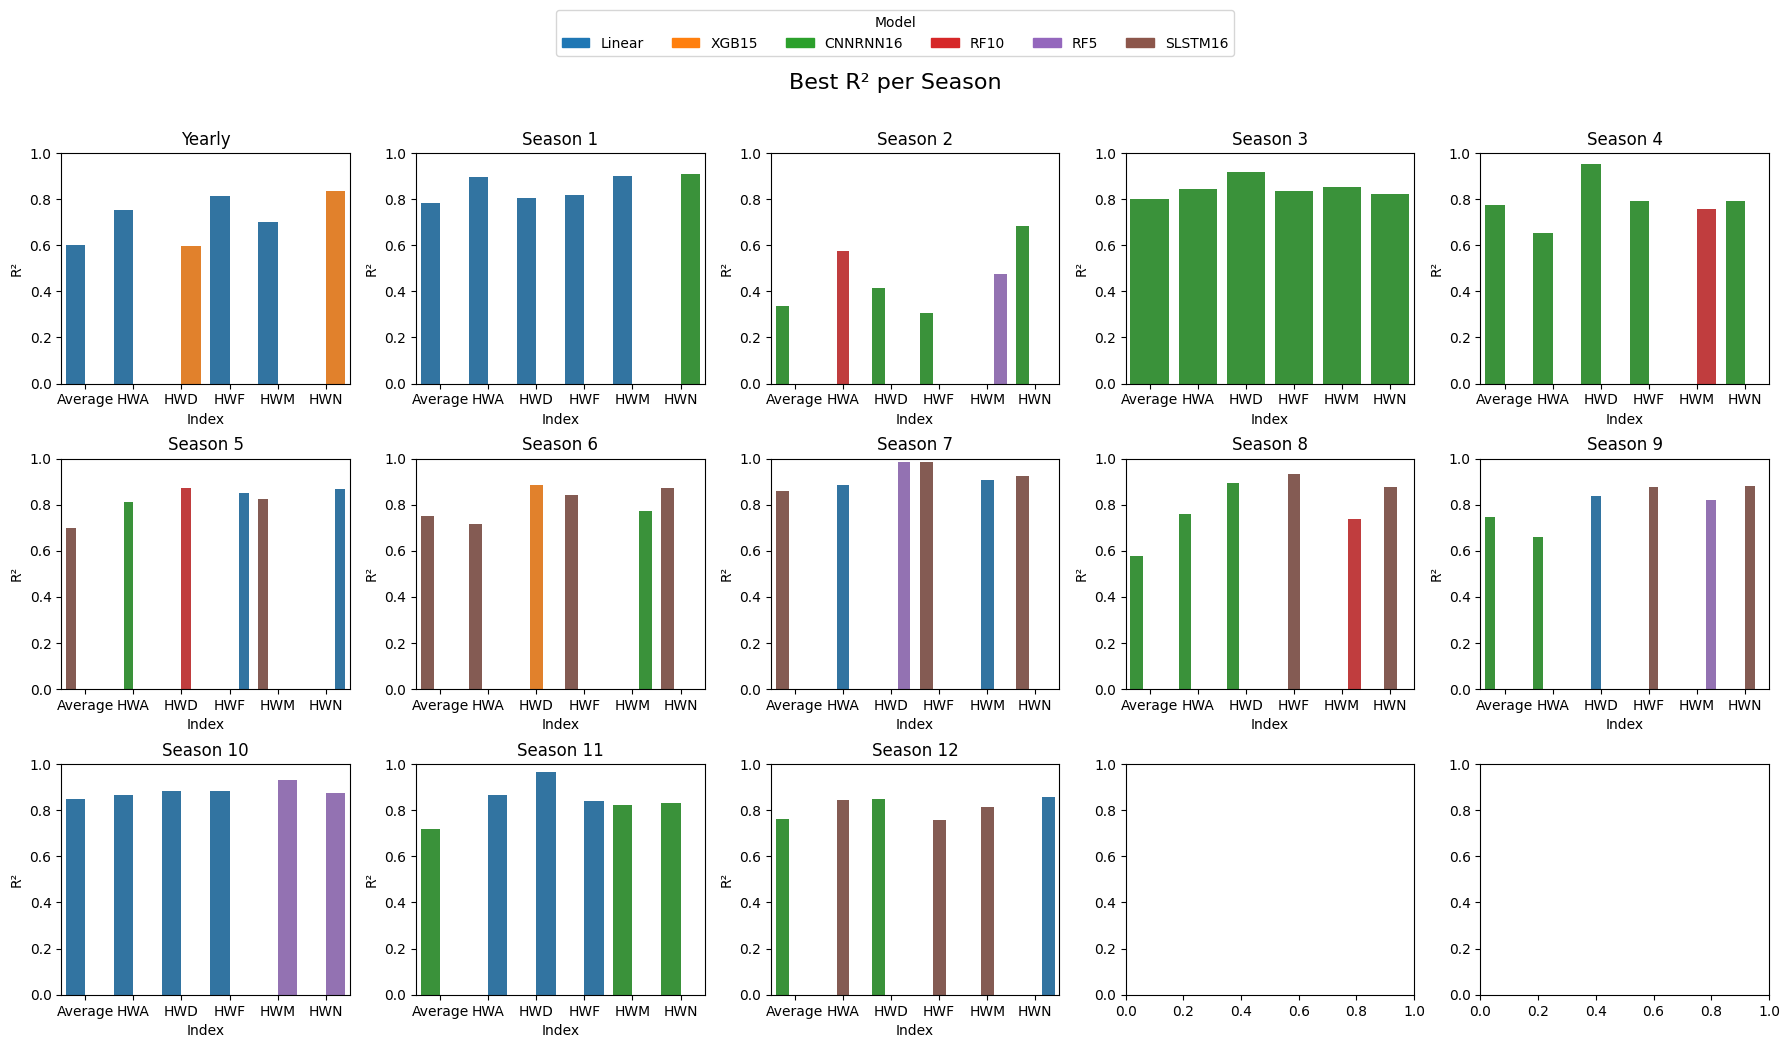

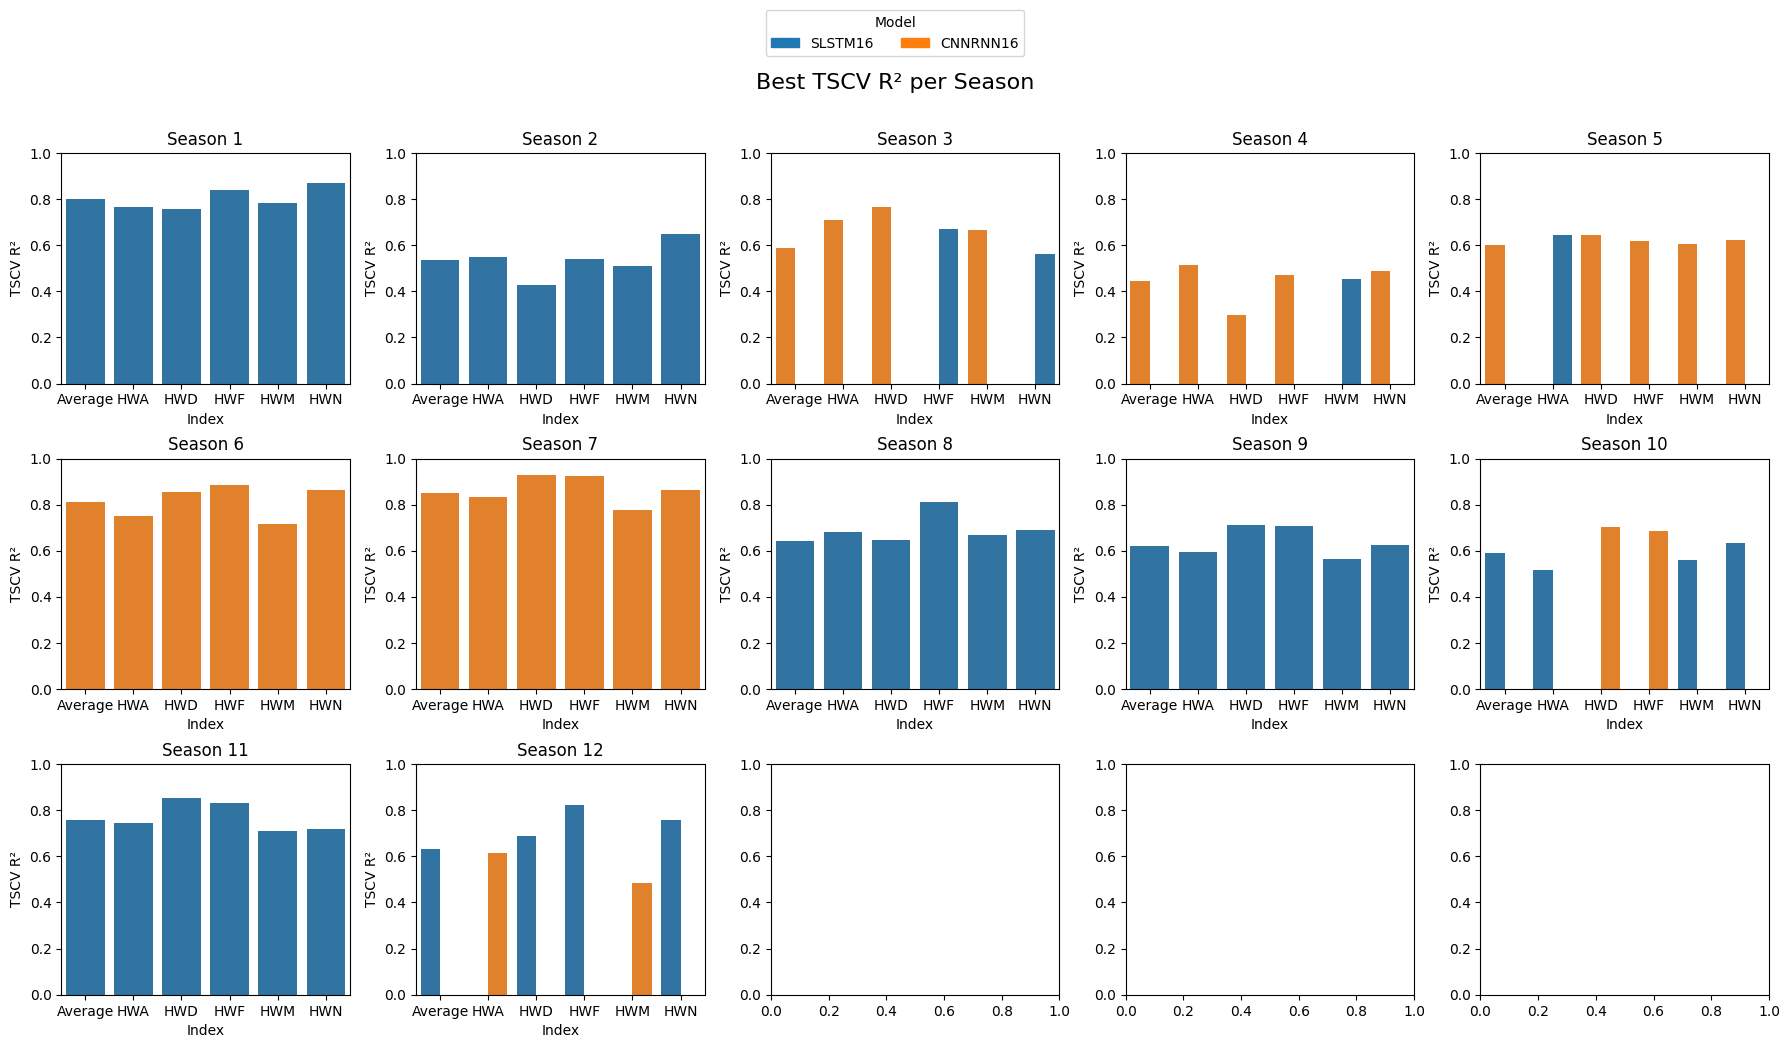

<Figure size 1800x1000 with 0 Axes>

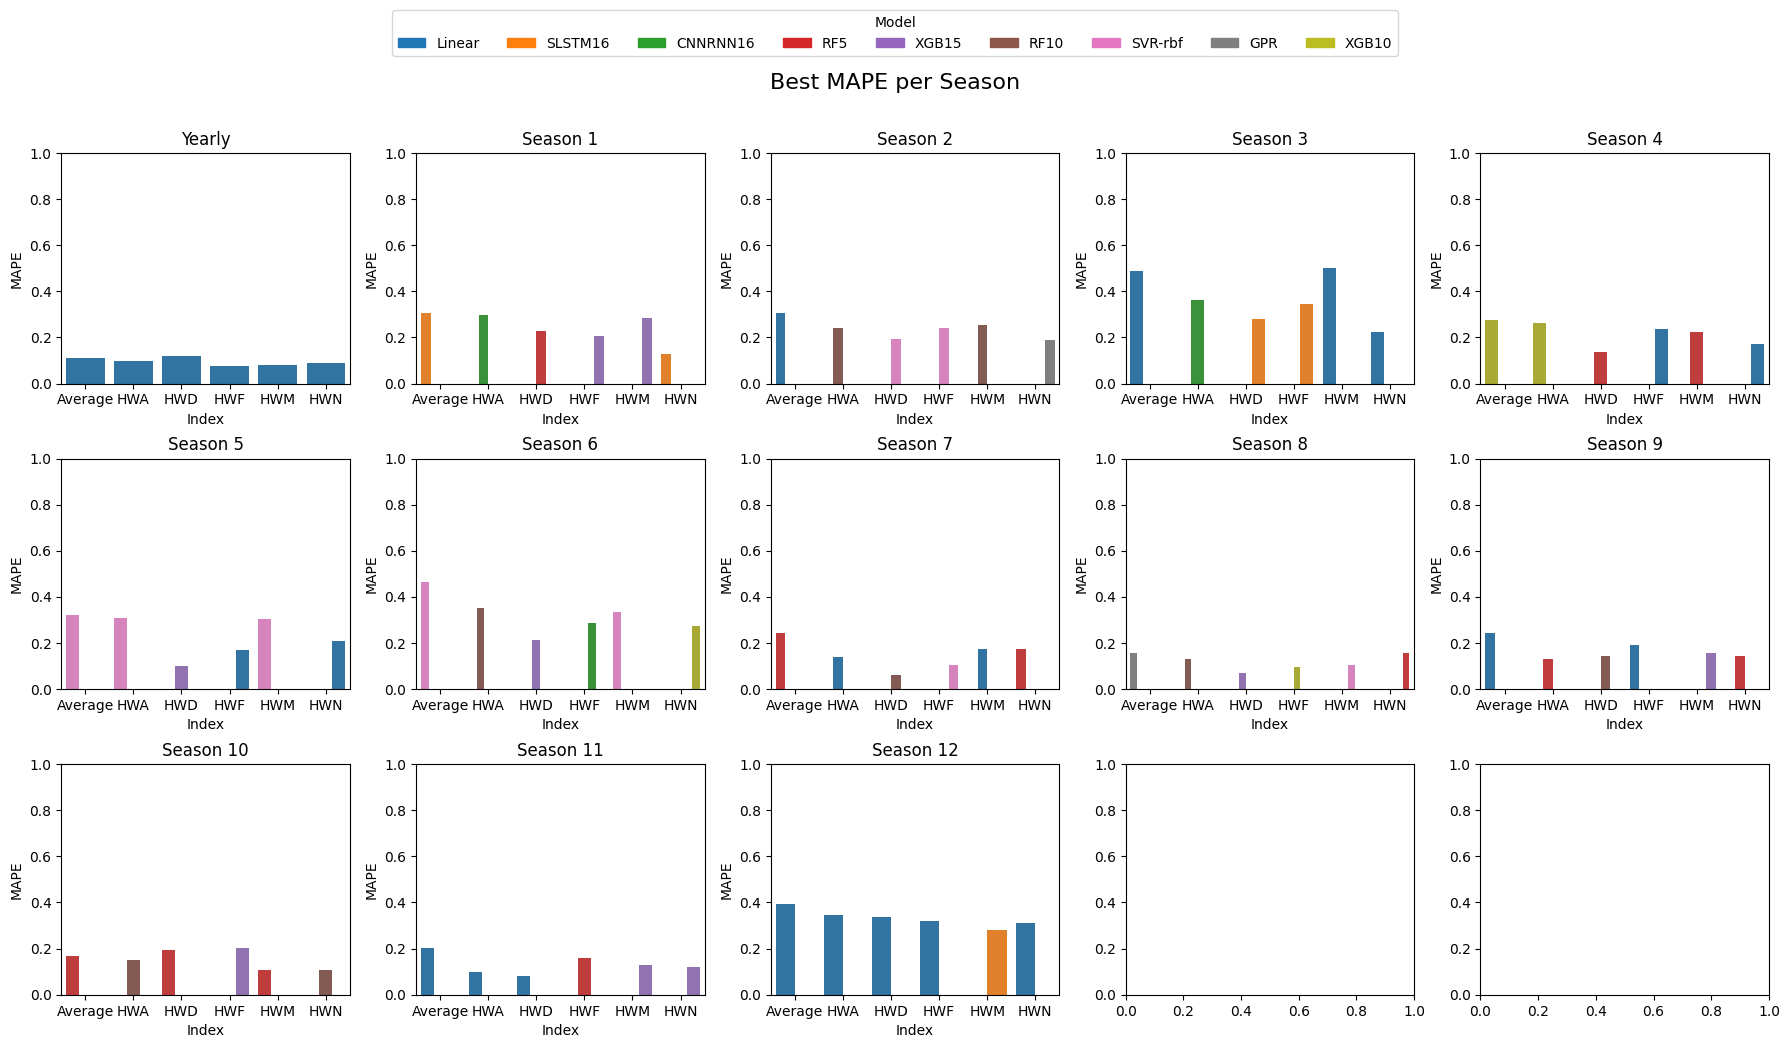

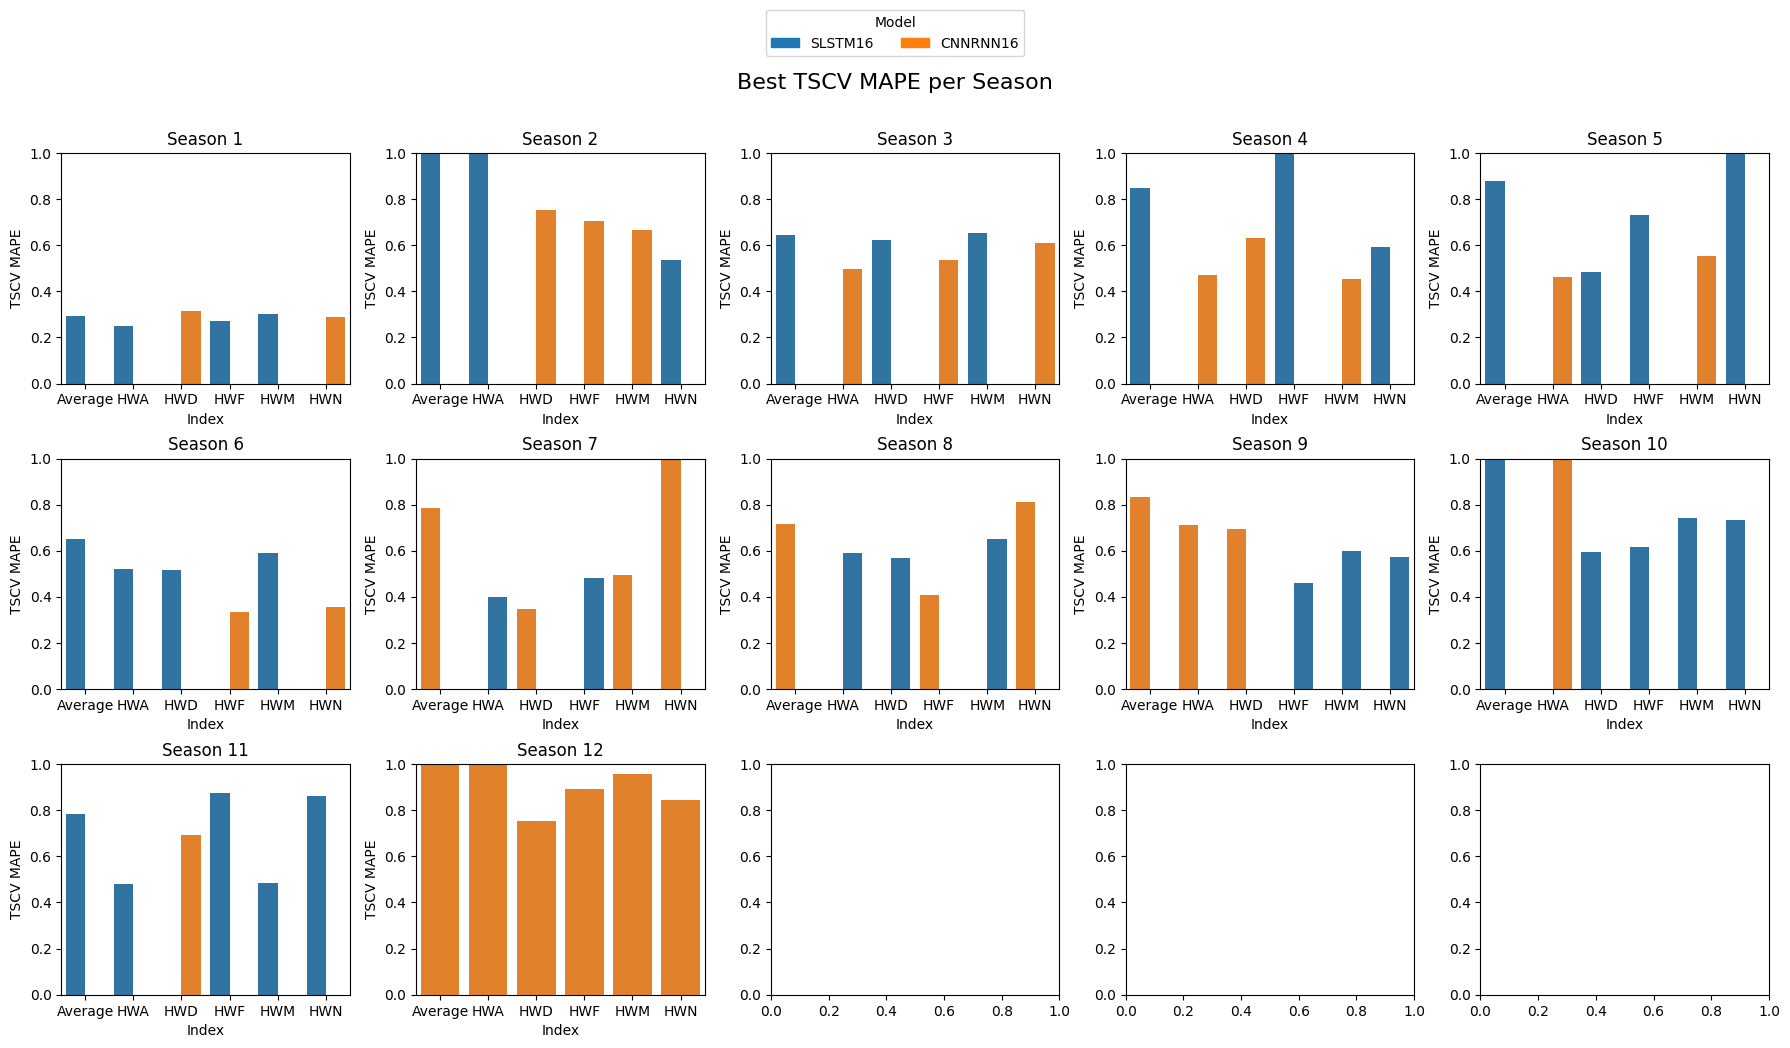

In [11]:
# Plot R2 results
plot_best_results_per_season(r2_seasons, "R²", "prediction", "Best R² per Season")

# Plot CV R2 results
plot_best_results_per_season(tscv_r2_seasons, "TSCV R²", "TSCV","Best TSCV R² per Season")

# Plot MAPE results (invert y-axis since lower is better)
plt.figure(figsize=(18, 10))
plot_best_results_per_season(mape_seasons, "MAPE", "prediction", "Best MAPE per Season")
plot_best_results_per_season(tscv_mape_seasons, "TSCV MAPE", "TSCV", "Best TSCV MAPE per Season")


In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_mape_seasons.sort_values("best_value", ascending=True))

model    index  best_value   id_data                       filename   
1   SLSTM16      HWA    0.250437  f12d9b95   predictor_f12d9b95_1.parquet  \
3   SLSTM16      HWF    0.270073  f12d9b95   predictor_f12d9b95_1.parquet   
5  CNNRNN16      HWN    0.286703  8da16805   predictor_8da16805_1.parquet   
0   SLSTM16  Average    0.292090  f12d9b95   predictor_f12d9b95_1.parquet   
4   SLSTM16      HWM    0.302843  f12d9b95   predictor_f12d9b95_1.parquet   
2  CNNRNN16      HWD    0.312642  a897f059   predictor_a897f059_1.parquet   
3  CNNRNN16      HWF    0.334348  8476ed61   predictor_8476ed61_6.parquet   
2  CNNRNN16      HWD    0.347267  f8698b6f   predictor_f8698b6f_7.parquet   
5  CNNRNN16      HWN    0.357511  8476ed61   predictor_8476ed61_6.parquet   
1   SLSTM16      HWA    0.399895  8d43646f   predictor_8d43646f_7.parquet   
3  CNNRNN16      HWF    0.410020  6b94181a   predictor_6b94181a_8.parquet   
4  CNNRNN16      HWM    0.455302  141689a6   predictor_141689a6_4.parquet   
3   SLSTM16      HWF    0.461114  8c2565cc   predictor_8c2565cc_9.parquet   
1  CNNRNN16      HWA    0.462135  63b4591b   predictor_63b4591b_5.parquet   
1  CNNRNN16      HWA    0.469490  141689a6   predictor_141689a6_4.parquet   
1   SLSTM16      HWA    0.482226  6259a7a0  predictor_6259a7a0_11.parquet   
4   SLSTM16      HWM    0.483118  6259a7a0  predictor_6259a7a0_11.parquet   
3   SLSTM16      HWF    0.483578  2ee27267   predictor_2ee27267_7.parquet   
2   SLSTM16      HWD    0.484533  8476ed61   predictor_8476ed61_5.parquet   
4  CNNRNN16      HWM    0.494715  895e7c53   predictor_895e7c53_7.parquet   
1  CNNRNN16      HWA    0.494830  4ccfcb80   predictor_4ccfcb80_3.parquet   
2   SLSTM16      HWD    0.514809  f12d9b95   predictor_f12d9b95_6.parquet   
1   SLSTM16      HWA    0.519466  c6715001   predictor_c6715001_6.parquet   
3  CNNRNN16      HWF    0.534319  a931928c   predictor_a931928c_3.parquet   
5   SLSTM16      HWN    0.536181  38af6be5   predictor_38af6be5_2.parquet   
4  CNNRNN16      HWM    0.554175  63b4591b   predictor_63b4591b_5.parquet   
2   SLSTM16      HWD    0.568338  5cb46bcc   predictor_5cb46bcc_8.parquet   
5   SLSTM16      HWN    0.574110  ca022c71   predictor_ca022c71_9.parquet   
1   SLSTM16      HWA    0.588783  07c355d1   predictor_07c355d1_8.parquet   
4   SLSTM16      HWM    0.590246  a931928c   predictor_a931928c_6.parquet   
5   SLSTM16      HWN    0.592000  ea245beb   predictor_ea245beb_4.parquet   
2   SLSTM16      HWD    0.596176  dcddde06  predictor_dcddde06_10.parquet   
4   SLSTM16      HWM    0.600814  38af6be5   predictor_38af6be5_9.parquet   
5  CNNRNN16      HWN    0.611347  c3da4202   predictor_c3da4202_3.parquet   
3   SLSTM16      HWF    0.618215  3a03ff61  predictor_3a03ff61_10.parquet   
2   SLSTM16      HWD    0.620799  13d4975d   predictor_13d4975d_3.parquet   
2  CNNRNN16      HWD    0.631801  141689a6   predictor_141689a6_4.parquet   
0   SLSTM16  Average    0.646391  13d4975d   predictor_13d4975d_3.parquet   
4   SLSTM16      HWM    0.651704  13d4975d   predictor_13d4975d_3.parquet   
0   SLSTM16  Average    0.652107  a931928c   predictor_a931928c_6.parquet   
4   SLSTM16      HWM    0.652360  07c355d1   predictor_07c355d1_8.parquet   
4  CNNRNN16      HWM    0.665580  4f08288f   predictor_4f08288f_2.parquet   
2  CNNRNN16      HWD    0.693627  a90e15e3  predictor_a90e15e3_11.parquet   
2  CNNRNN16      HWD    0.695490  af4c86de   predictor_af4c86de_9.parquet   
3  CNNRNN16      HWF    0.703364  eec28d6c   predictor_eec28d6c_2.parquet   
1  CNNRNN16      HWA    0.712933  c9734717   predictor_c9734717_9.parquet   
0  CNNRNN16  Average    0.718375  45e525be   predictor_45e525be_8.parquet   
3   SLSTM16      HWF    0.729557  8476ed61   predictor_8476ed61_5.parquet   
5   SLSTM16      HWN    0.732482  3ea1d70c  predictor_3ea1d70c_10.parquet   
4   SLSTM16      HWM    0.741999  3ea1d70c  predictor_3ea1d70c_10.parquet   
2  CNNRNN16      HWD    0.753760  5e6cf1d7   predictor_5e6cf1d7_2.parquet   
2 

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


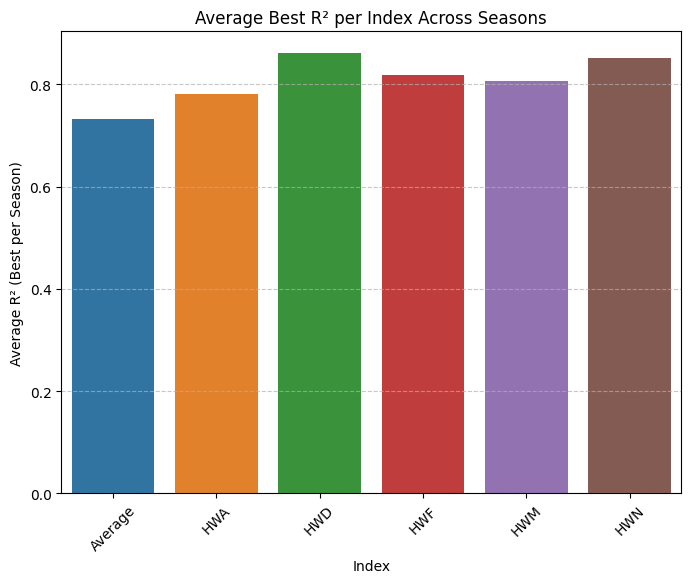

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


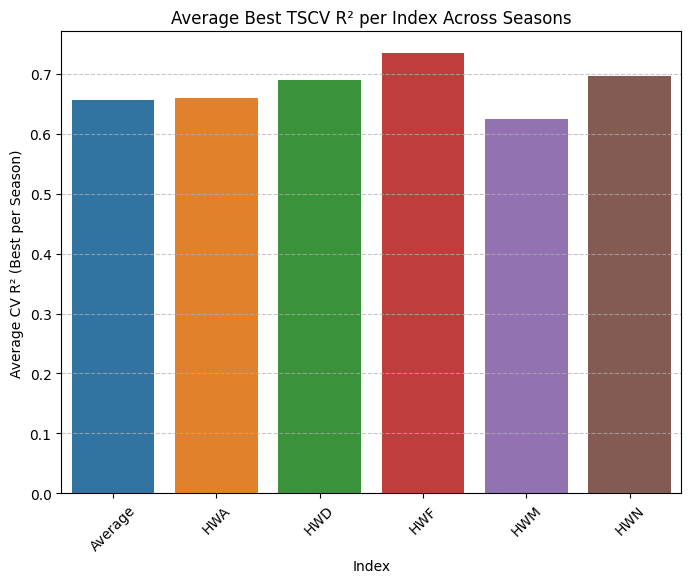

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


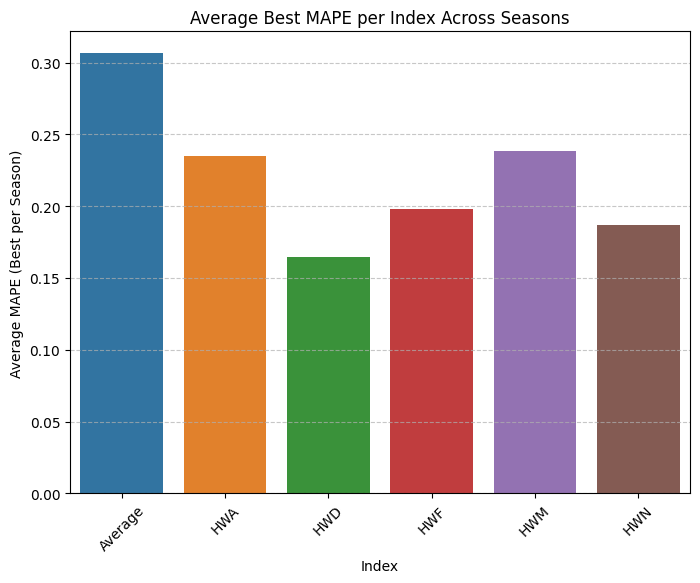

In [14]:
# Example usage
plot_average_best_results(r2_seasons, "R²", "Average Best R² per Index Across Seasons")
plot_average_best_results(tscv_r2_seasons, "CV R²", "Average Best TSCV R² per Index Across Seasons")
plot_average_best_results(mape_seasons, "MAPE", "Average Best MAPE per Index Across Seasons")

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(r2_seasons.sort_values("best_value", ascending=False))

model  season   id_data    index  best_value  training_value   
4        RF5       7  d53af68d      HWD    0.986058        0.811888  \
5        RF5       7  44440fcb      HWD    0.986058        0.811888   
6    SLSTM16       7  707bacc6      HWF    0.985771        0.583720   
4     Linear      11  13978dd3      HWD    0.964174        0.617119   
7   CNNRNN16       7  8238d521      HWF    0.960682        0.513593   
5     Linear      11  5cb46bcc      HWD    0.958226        0.618929   
4   CNNRNN16       4  141689a6      HWD    0.953289        0.708749   
6    SLSTM16       8  cbafbe22      HWF    0.934899        0.381566   
16       RF5      10  a1ecabc1      HWM    0.931446        0.822688   
15       RF5      10  a23ee919      HWM    0.931446        0.822688   
14       RF5      10  a23ee919      HWM    0.931446        0.822688   
17       RF5      10  a1ecabc1      HWM    0.931446        0.822688   
10   SLSTM16       7  707bacc6      HWN    0.924598        0.602071   
4   CNNRNN16       3  5e6cf1d7      HWD    0.916154        0.575375   
11   SLSTM16       7  f12d9b95      HWN    0.915312        0.414169   
10  CNNRNN16       1  369f50ac      HWN    0.910089        0.831419   
7   CNNRNN16       8  5451e645      HWF    0.909400        0.326459   
8     Linear       7  ce3212c2      HWM    0.905206        0.598336   
9     Linear       7  ac11c437      HWM    0.905206        0.598336   
8     Linear       1  f8dcf6a5      HWM    0.901134        0.881917   
5   CNNRNN16       3  07c355d1      HWD    0.900617        0.762803   
2     Linear       1  f8dcf6a5      HWA    0.896659        0.872206   
4   CNNRNN16       8  d2f54f2b      HWD    0.896190        0.484721   
11    Linear       1  67438ee1      HWN    0.891340        0.872279   
12    Linear       1  67438ee1      HWN    0.891340        0.872279   
2     Linear       7  d53af68d      HWA    0.885691        0.594391   
3     Linear       7  44440fcb      HWA    0.885691        0.594391   
7      XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
4      XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
6      XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
5      XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
7     Linear      10  bf731a61      HWD    0.885143        0.617466   
8     Linear      10  2e7e0446      HWD    0.885143        0.617466   
6     Linear      10  bf731a61      HWD    0.885143        0.617466   
9     Linear      10  2e7e0446      HWD    0.885143        0.617466   
10   SLSTM16       9  87eea47c      HWN    0.882893       -0.174882   
13    Linear      10  2e7e0446      HWF    0.881968        0.641914   
10    Linear      10  bf731a61      HWF    0.881968        0.641914   
11    Linear      10  bf731a61      HWF    0.881968        0.641914   
12    Linear      10  2e7e0446      HWF    0.881968        0.641914   
5   CNNRNN16       4  e1184889      HWD    0.878284        0.145728   
6    SLSTM16       9  87eea47c      HWF    0.877954       -0.226165   
19       RF5      10  e0a90477      HWN    0.877049        0.808199   
18       RF5      10  f2406afd      HWN    0.877049        0.808199   
5     Linear       8  620f370b      HWD    0.875921        0.500146   
10   SLSTM16       8  b38625fe      HWN    0.875892        0.248339   
4       RF10       5  e1e58f2d      HWD    0.874305        0.830964   
5       RF10       5  e1e58f2d      HWD    0.874305        0.830964   
6       RF10       5  e1e58f2d      HWD    0.874305        0.830964   
7       RF10       5  e1e58f2d      HWD    0.874305        0.830964   
13   SLSTM16       6  0c63f5a6      HWN    0.872533       -0.289425   
2     Linear      11  f4e1848d      HWA    0.867792        0.490372   
14    Linear       5  c7caeba3      HWN    0.866147        0.772203   
15    Linear       5  c7caeba3      HWN    0.866147        0.772203   
16    Linear       5  c7caeba3      HWN    0.866147        0.772203   
17    Linear       5  c7caeba3 

In [16]:
tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

model    index  best_value   id_data                       filename   
0   SLSTM16  Average    0.802371  f12d9b95   predictor_f12d9b95_1.parquet  \
1   SLSTM16      HWA    0.763804  f12d9b95   predictor_f12d9b95_1.parquet   
2   SLSTM16      HWD    0.757198  f12d9b95   predictor_f12d9b95_1.parquet   
3   SLSTM16      HWF    0.837520  f12d9b95   predictor_f12d9b95_1.parquet   
4   SLSTM16      HWM    0.783686  f12d9b95   predictor_f12d9b95_1.parquet   
5   SLSTM16      HWN    0.869649  f12d9b95   predictor_f12d9b95_1.parquet   
1  CNNRNN16      HWA    0.710067  4ccfcb80   predictor_4ccfcb80_3.parquet   
2  CNNRNN16      HWD    0.767790  369f50ac   predictor_369f50ac_3.parquet   
0  CNNRNN16  Average    0.811530  8476ed61   predictor_8476ed61_6.parquet   
1  CNNRNN16      HWA    0.750384  8476ed61   predictor_8476ed61_6.parquet   
2  CNNRNN16      HWD    0.856997  8476ed61   predictor_8476ed61_6.parquet   
3  CNNRNN16      HWF    0.887310  8476ed61   predictor_8476ed61_6.parquet   
4  CNNRNN16      HWM    0.714222  dcddde06   predictor_dcddde06_6.parquet   
5  CNNRNN16      HWN    0.863145  8476ed61   predictor_8476ed61_6.parquet   
0  CNNRNN16  Average    0.849224  f8698b6f   predictor_f8698b6f_7.parquet   
1  CNNRNN16      HWA    0.834660  f8698b6f   predictor_f8698b6f_7.parquet   
2  CNNRNN16      HWD    0.930413  f12d9b95   predictor_f12d9b95_7.parquet   
3  CNNRNN16      HWF    0.924386  f12d9b95   predictor_f12d9b95_7.parquet   
4  CNNRNN16      HWM    0.778398  f8698b6f   predictor_f8698b6f_7.parquet   
5  CNNRNN16      HWN    0.865811  f8698b6f   predictor_f8698b6f_7.parquet   
3   SLSTM16      HWF    0.812544  5cb46bcc   predictor_5cb46bcc_8.parquet   
2   SLSTM16      HWD    0.711121  c6715001   predictor_c6715001_9.parquet   
3   SLSTM16      HWF    0.706299  4ccfcb80   predictor_4ccfcb80_9.parquet   
2  CNNRNN16      HWD    0.703271  8476ed61  predictor_8476ed61_10.parquet   
0   SLSTM16  Average    0.759120  993bfd0e  predictor_993bfd0e_11.parquet   
1   SLSTM16      HWA    0.744784  993bfd0e  predictor_993bfd0e_11.parquet   
2   SLSTM16      HWD    0.853751  993bfd0e  predictor_993bfd0e_11.parquet   
3   SLSTM16      HWF    0.833700  dcddde06  predictor_dcddde06_11.parquet   
4   SLSTM16      HWM    0.708715  6259a7a0  predictor_6259a7a0_11.parquet   
5   SLSTM16      HWN    0.718309  993bfd0e  predictor_993bfd0e_11.parquet   
3   SLSTM16      HWF    0.823882  ae5b2360  predictor_ae5b2360_12.parquet   
5   SLSTM16      HWN    0.756240  ae5b2360  predictor_ae5b2360_12.parquet   

   boxes  top_n  var_thresh  modes frequency  season methods extra_indices   
0      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM  \
1      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM   
2      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM   
3      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM   
4      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM   
5      0     30        0.10      3  2monthly       1      ps   PDO-ONI-SAM   
1      0     20        0.05      1  2monthly       3      ps   PDO-ONI-SAM   
2      0     15         NaN      3  2monthly       3      ps   PDO-ONI-SAM   
0      0     30        0.15      2  2monthly       6      ps   PDO-ONI-SAM   
1      0     30        0.15      2  2monthly       6      ps   PDO-ONI-SAM   
2      0     30        0.15      2  2monthly       6      ps   PDO-ONI-SAM   
3      0     30        0.15      2  2monthly       6      ps   PDO-ONI-SAM   
4      0     30         NaN      2  2monthly       6      ps   PDO-ONI-SAM   
5      0     30        0.15      2  2monthly       6      ps   PDO-ONI-SAM   
0      0     30        0.15      3  2monthly       7      ps   PDO-ONI-SAM   
1      0     30        0.15      3  2monthly       7      ps   PDO-ONI-SAM   
2      0     30        0.10      3  2monthly       7      ps   PDO-ONI-SAM   
3      0     30        0.10      3  2monthly       7      ps

In [ ]:
with open("pcas_1972.pkl", "rb") as inp:
    pcas_sst = pickle.load(inp)
interest_ids = cv_r2_seasons[(cv_r2_seasons["best_value"] >= 0.4)]
df1 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        continue
    else:
        temp = ""
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in row["extra_indices"]:
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
                k+=1
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_sst[id_pca].variables_dict.values())
            box = pcas_sst[id_pca].box
            mode = pcas[i][-1]
            df1.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_sst
display(df1)



Empty DataFrame
Columns: [id_data, id_pca, mode, box, variables]
Index: []

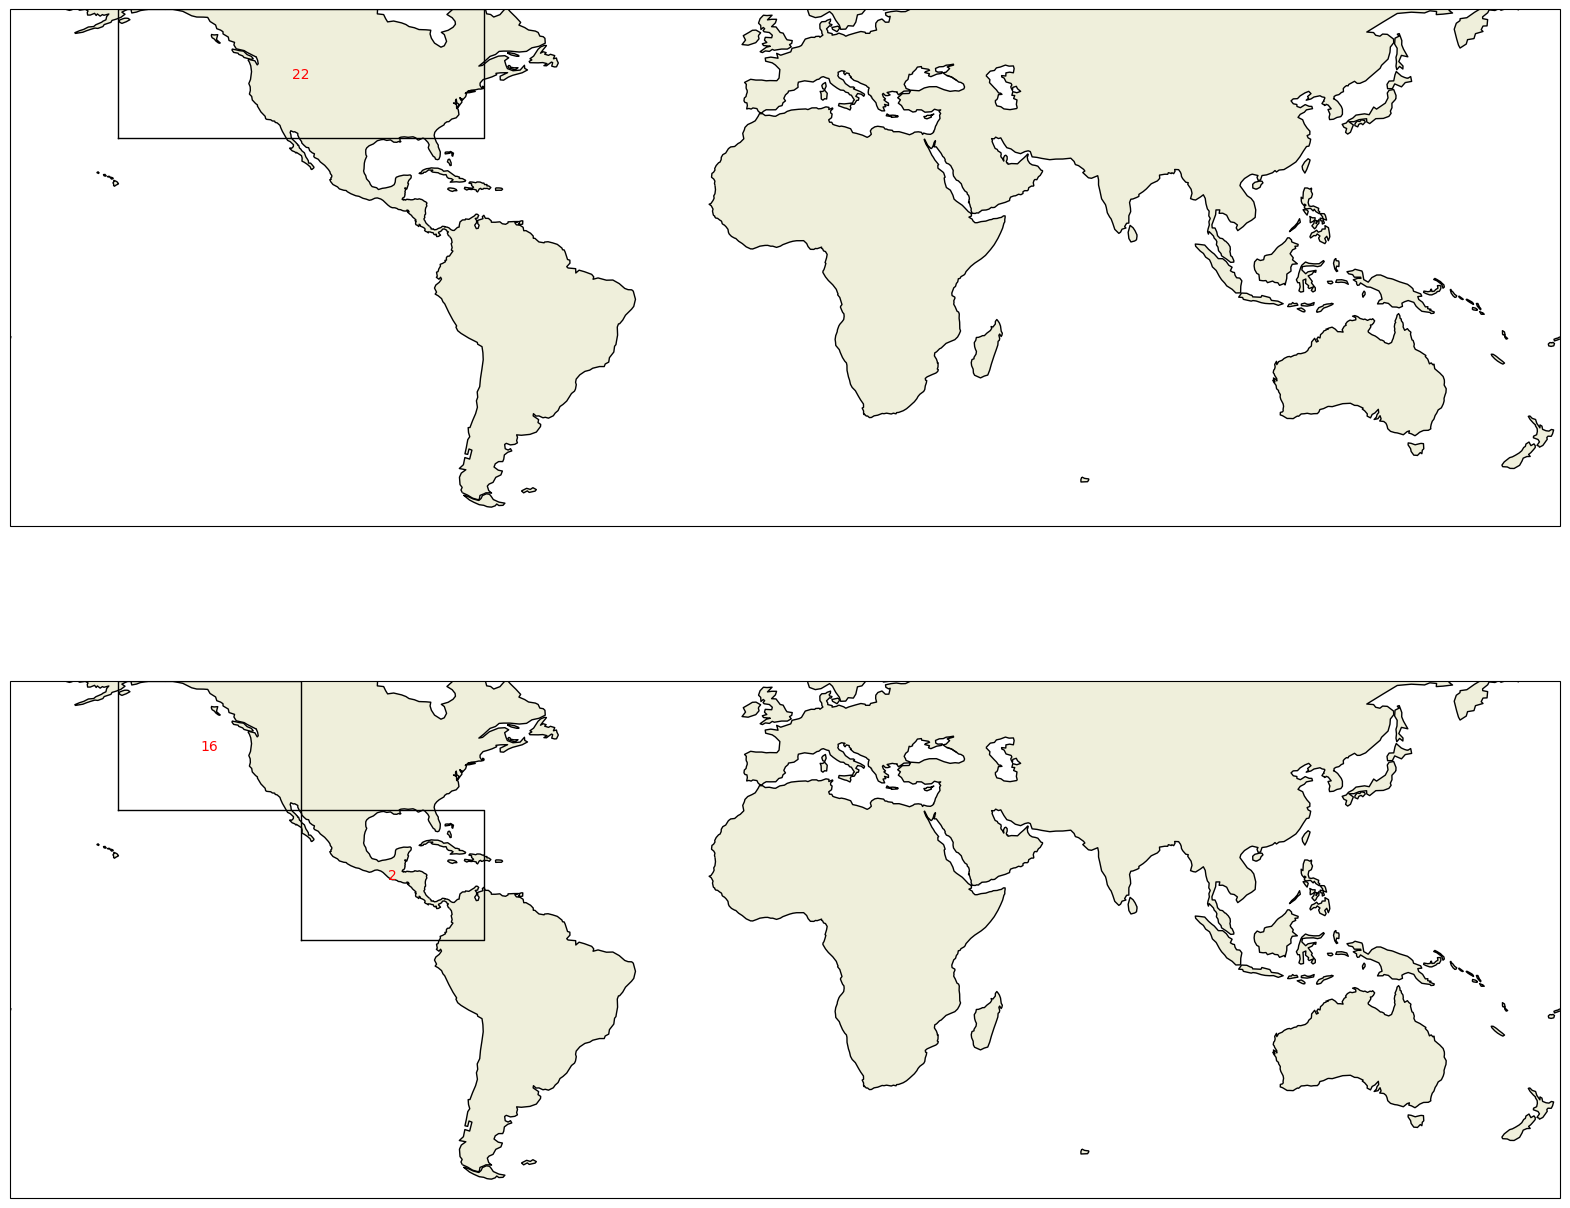

In [ ]:
plot_grid_count(df1)

In [20]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
interest_ids = tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        temp = "_t2m"
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in str(row["extra_indices"]):
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                   box           variables
0    f12d9b95     193    3  [247.5, 290, 30, 60]                 [Z]
1    f12d9b95    1084    3    [205, 290, 30, 60]            [TTR, Z]
2    f12d9b95    1075    2    [205, 290, 30, 60]                 [Z]
3    f12d9b95     130    2  [205, 247.5, 30, 60]                 [Z]
4    f12d9b95    1094    3    [205, 290, 30, 60]        [SP, TTR, Z]
..        ...     ...  ...                   ...                 ...
890  ae5b2360     240    2  [247.5, 290, 30, 60]  [TTR, U10, V10, Z]
891  ae5b2360     239    3  [247.5, 290, 30, 60]   [SP, V10, Z, T2M]
892  ae5b2360      94    3  [162.5, 205, 30, 60]     [TTR, U10, V10]
893  ae5b2360      63    2  [162.5, 205, 30, 60]                [SP]
894  ae5b2360      69    3  [162.5, 205, 30, 60]           [SP, TTR]

[895 rows x 5 columns]

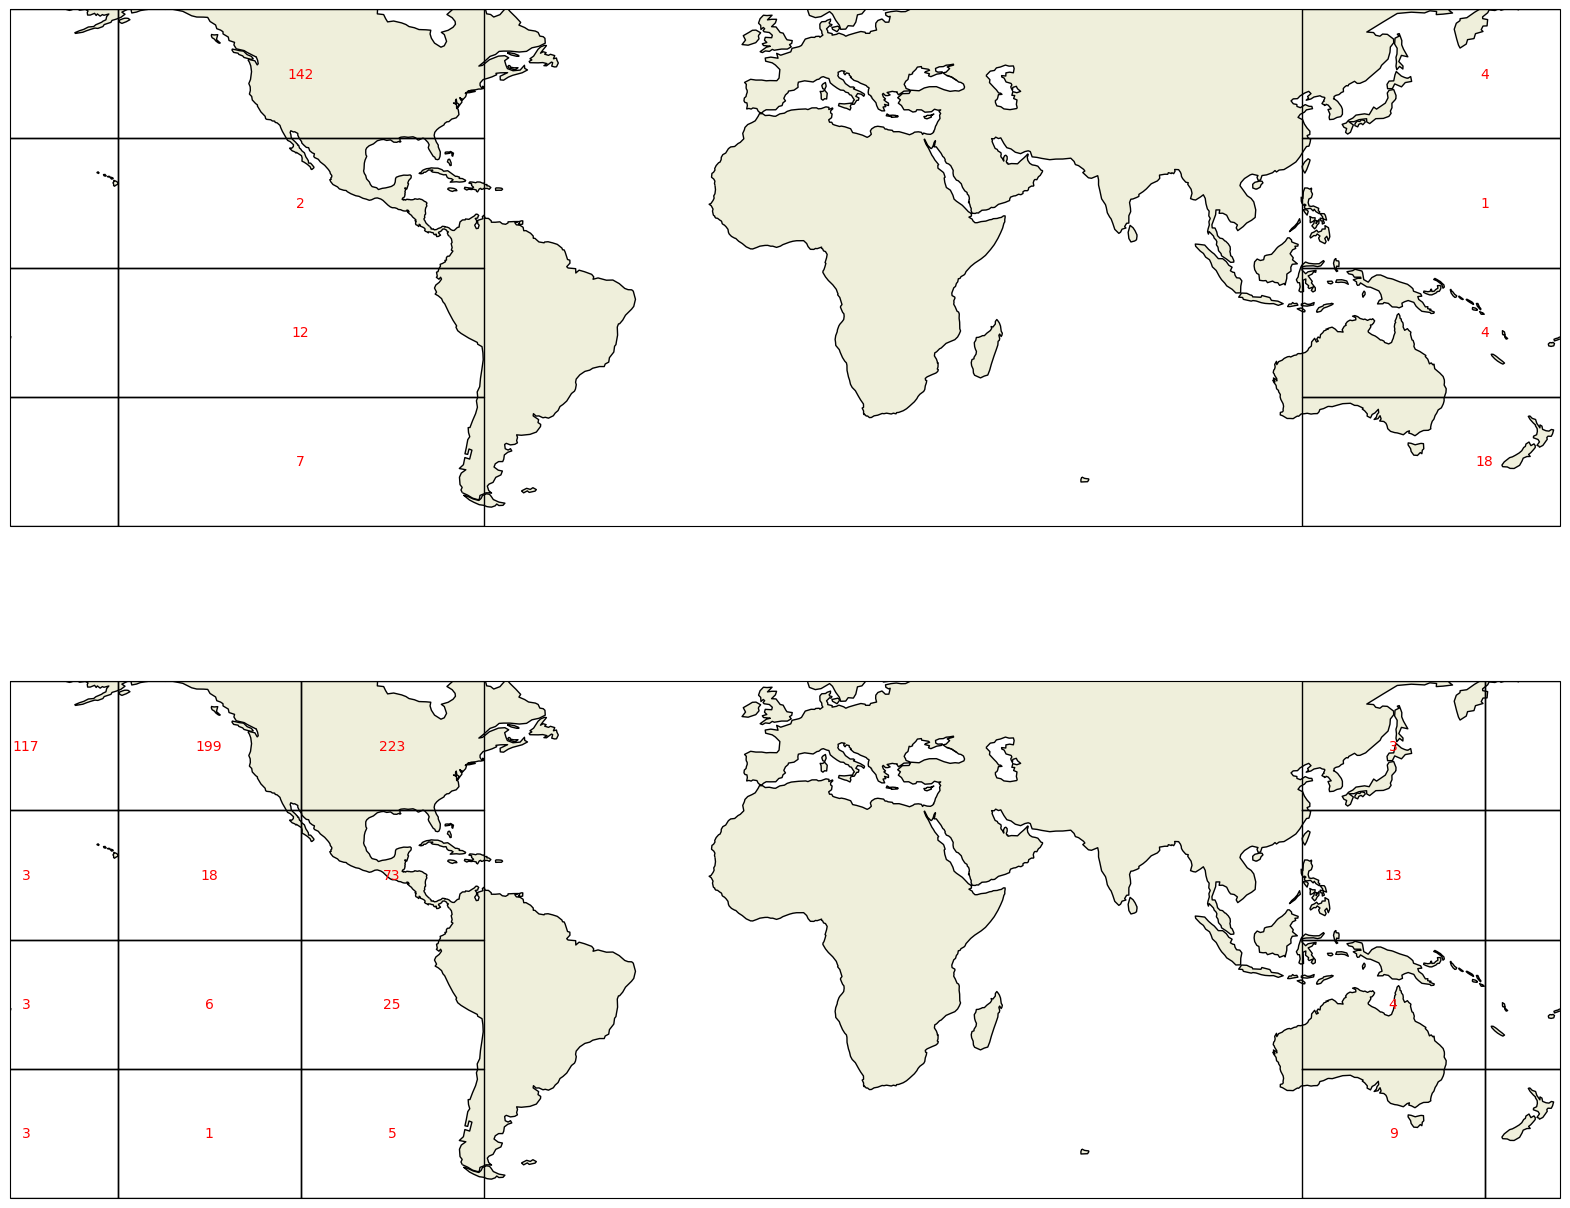

In [21]:
plot_grid_count(df2)

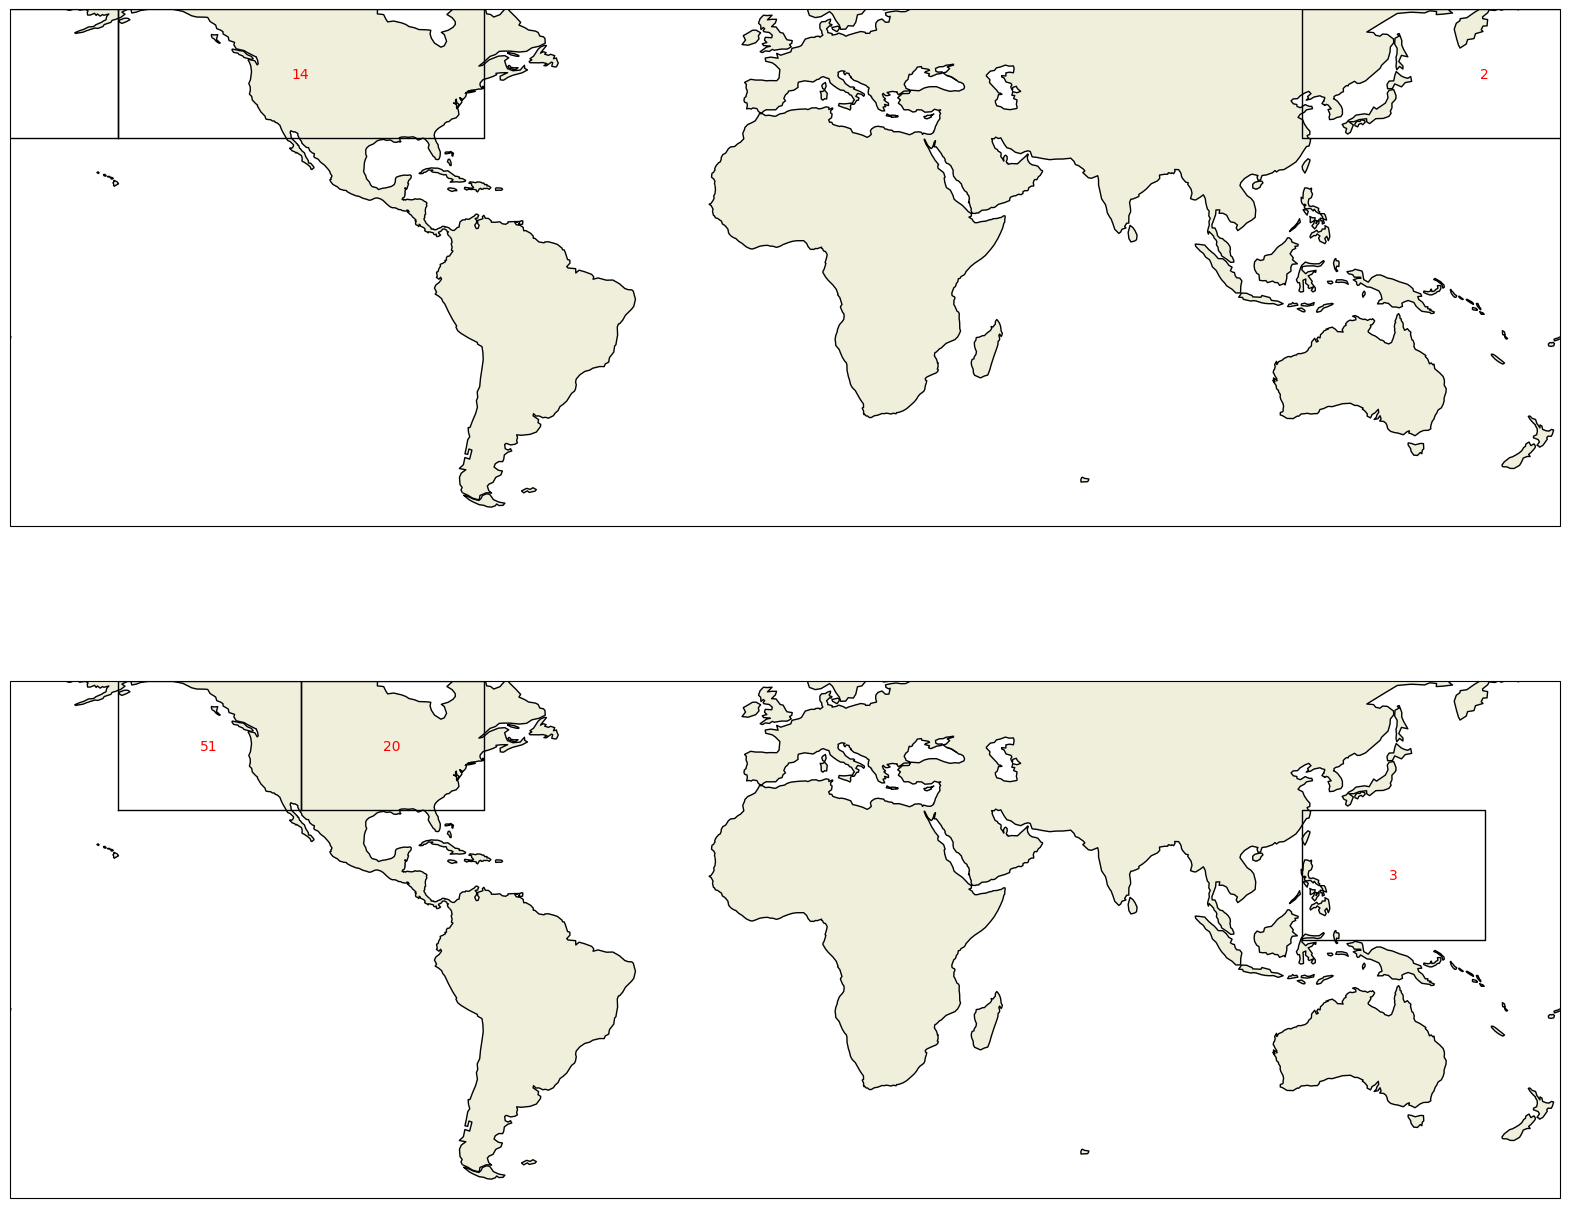

In [ ]:
# plot_grid_count(df2) old

## Chile

In [22]:
region = "chile"
FREQUENCY= "2monthly"
metadata_sst = pd.read_csv(f"data/new_features/{region}/metadata.csv")
metadata_t2m = pd.read_csv(f"data/new_features_t2m/{region}/metadata.csv")
metadata = pd.concat((metadata_sst,metadata_t2m))
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

id_data                       filename  boxes  top_n  var_thresh   
0     193d753c     predictor_193d753c.parquet      0      5         NaN  \
1     2775aa34     predictor_2775aa34.parquet      0     10         NaN   
2     25a8ed97     predictor_25a8ed97.parquet      0     15         NaN   
3     7da22af6     predictor_7da22af6.parquet      0     20         NaN   
4     daef6aaa     predictor_daef6aaa.parquet      0     30         NaN   
...        ...                            ...    ...    ...         ...   
1495  a59026f4   predictor_a59026f4_8.parquet      0     30        0.15   
1496  a59026f4   predictor_a59026f4_9.parquet      0     30        0.15   
1497  a59026f4  predictor_a59026f4_10.parquet      0     30        0.15   
1498  a59026f4  predictor_a59026f4_11.parquet      0     30        0.15   
1499  a59026f4  predictor_a59026f4_12.parquet      0     30        0.15   

      modes frequency  season methods extra_indices  only_sea  
0         1    yearly       0      ps           NaN      True  
1         1    yearly       0      ps           NaN      True  
2         1    yearly       0      ps           NaN      True  
3         1    yearly       0      ps           NaN      True  
4         1    yearly       0      ps           NaN      True  
...     ...       ...     ...     ...           ...       ...  
1495      3  2monthly       8      ps   PDO-ONI-SAM     False  
1496      3  2monthly       9      ps   PDO-ONI-SAM     False  
1497      3  2monthly      10      ps   PDO-ONI-SAM     False  
1498      3  2monthly      11      ps   PDO-ONI-SAM     False  
1499      3  2monthly      12      ps   PDO-ONI-SAM     False  

[3000 rows x 11 columns]

In [23]:
results_sst = pd.read_csv(f"data/{region}_results/results_sst.csv")
results_t2m = pd.read_csv(f"data/{region}_results/results.csv")
results = pd.concat((results_sst,results_t2m))
results

model  season metric       stage       HWN       HWF       HWD   
0         Linear       1     r2  prediction -0.013273 -0.494648 -0.638861  \
1            RF5       1     r2  prediction -0.570155 -1.468624 -1.518753   
2           RF10       1     r2  prediction -0.675097 -1.390106 -1.573718   
3        SVR-rbf       1     r2  prediction -0.159107 -1.274360 -1.693932   
4          XGB10       1     r2  prediction -0.738051 -1.100790 -0.870228   
...          ...     ...    ...         ...       ...       ...       ...   
132355  CNNRNN16      10   mape        TSCV  1.811653  3.966835  2.884798   
132356   SLSTM16      11   mape        TSCV  3.015681  1.485459  5.254072   
132357  CNNRNN16      11   mape        TSCV  2.161642  1.120916  4.057204   
132358   SLSTM16      12   mape        TSCV  0.574519  0.476246  0.573523   
132359  CNNRNN16      12   mape        TSCV  1.897860  0.942321  2.660384   

             HWM       HWA   Average   id_data  
0       0.143481 -0.007388 -0.202138  515c5f16  
1      -0.231282 -0.142382 -0.786239  515c5f16  
2      -0.083434 -0.680643 -0.880600  515c5f16  
3      -0.236283 -0.432886 -0.759314  515c5f16  
4      -0.430557 -0.588640 -0.745653  515c5f16  
...          ...       ...       ...       ...  
132355  1.859804  3.665919  2.837802  a59026f4  
132356  3.549545  3.408951  3.342742  a59026f4  
132357  2.711474  1.974372  2.405121  a59026f4  
132358  0.537411  0.607364  0.553812  a59026f4  
132359  1.380837  1.377127  1.651706  a59026f4  

[192840 rows x 11 columns]

In [24]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")


In [25]:
summary_tscv_r2

model  season   id_data    index  best_value   
0    SLSTM16       7  c35f74dd  Average    0.717316  \
1    SLSTM16      11  82de8d97  Average    0.696156   
2    SLSTM16      12  c9589884      HWA    0.738178   
3   CNNRNN16      12  113de1dd      HWA    0.729636   
4    SLSTM16       7  c35f74dd      HWD    0.822891   
5    SLSTM16       7  82de8d97      HWD    0.813008   
6   CNNRNN16       7  6ea5a75b      HWF    0.851592   
7    SLSTM16       7  c35f74dd      HWF    0.844601   
8   CNNRNN16      12  113de1dd      HWM    0.780488   
9    SLSTM16      12  c9589884      HWM    0.751193   
10   SLSTM16       7  c35f74dd      HWN    0.830364   
11   SLSTM16       7  82de8d97      HWN    0.803073   

                         filename  boxes  top_n  var_thresh  modes frequency   
0    predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly  \
1   predictor_82de8d97_11.parquet      0     20        0.05      3  2monthly   
2   predictor_c9589884_12.parquet      0     20         NaN      2  2monthly   
3   predictor_113de1dd_12.parquet      0     15         NaN      1  2monthly   
4    predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly   
5    predictor_82de8d97_7.parquet      0     20        0.05      3  2monthly   
6    predictor_6ea5a75b_7.parquet      0     15        0.15      2  2monthly   
7    predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly   
8   predictor_113de1dd_12.parquet      0     15         NaN      1  2monthly   
9   predictor_c9589884_12.parquet      0     20         NaN      2  2monthly   
10   predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly   
11   predictor_82de8d97_7.parquet      0     20        0.05      3  2monthly   

   methods extra_indices  only_sea  
0       ps           NaN     False  
1       ps   PDO-ONI-SAM     False  
2       ps           NaN     False  
3       ps   PDO-ONI-SAM     False  
4       ps           NaN     False  
5       ps   PDO-ONI-SAM     False  
6       ps   PDO-ONI-SAM     False  
7       ps           NaN     False  
8       ps   PDO-ONI-SAM     False  
9       ps           NaN     False  
10      ps           NaN     False  
11      ps   PDO-ONI-SAM     False

Now we repite for each season

In [26]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [27]:
display_full(tscv_r2_seasons)

model    index  best_value   id_data                       filename   
0  CNNRNN16  Average    0.555224  7ec4afcb   predictor_7ec4afcb_1.parquet  \
1  CNNRNN16      HWA    0.683449  bc74a9b1   predictor_bc74a9b1_1.parquet   
2  CNNRNN16      HWD    0.437600  bc74a9b1   predictor_bc74a9b1_1.parquet   
3  CNNRNN16      HWF    0.399625  7ec4afcb   predictor_7ec4afcb_1.parquet   
4  CNNRNN16      HWM    0.721603  7ec4afcb   predictor_7ec4afcb_1.parquet   
5  CNNRNN16      HWN    0.641385  7ec4afcb   predictor_7ec4afcb_1.parquet   
0  CNNRNN16  Average   -0.303560  758ae625   predictor_758ae625_2.parquet   
1  CNNRNN16      HWA   -0.141678  758ae625   predictor_758ae625_2.parquet   
2  CNNRNN16      HWD   -0.167198  758ae625   predictor_758ae625_2.parquet   
3  CNNRNN16      HWF   -0.341420  ef86206a   predictor_ef86206a_2.parquet   
4  CNNRNN16      HWM   -0.237721  75268daa   predictor_75268daa_2.parquet   
5  CNNRNN16      HWN   -0.484158  ef86206a   predictor_ef86206a_2.parquet   
0   SLSTM16  Average    0.615273  f6801988   predictor_f6801988_3.parquet   
1   SLSTM16      HWA    0.605819  f6801988   predictor_f6801988_3.parquet   
2   SLSTM16      HWD    0.473419  f6801988   predictor_f6801988_3.parquet   
3   SLSTM16      HWF    0.730280  f6801988   predictor_f6801988_3.parquet   
4   SLSTM16      HWM    0.588303  c2cf81c9   predictor_c2cf81c9_3.parquet   
5   SLSTM16      HWN    0.720702  f6801988   predictor_f6801988_3.parquet   
0  CNNRNN16  Average    0.553262  09063d34   predictor_09063d34_4.parquet   
1  CNNRNN16      HWA    0.598785  09063d34   predictor_09063d34_4.parquet   
2  CNNRNN16      HWD    0.561435  09063d34   predictor_09063d34_4.parquet   
3   SLSTM16      HWF    0.510630  f6801988   predictor_f6801988_4.parquet   
4  CNNRNN16      HWM    0.574523  09063d34   predictor_09063d34_4.parquet   
5  CNNRNN16      HWN    0.527668  09063d34   predictor_09063d34_4.parquet   
0   SLSTM16  Average    0.609942  137e39ef   predictor_137e39ef_5.parquet   
1   SLSTM16      HWA    0.574577  09063d34   predictor_09063d34_5.parquet   
2   SLSTM16      HWD    0.717946  137e39ef   predictor_137e39ef_5.parquet   
3   SLSTM16      HWF    0.644959  137e39ef   predictor_137e39ef_5.parquet   
4   SLSTM16      HWM    0.570313  71075b32   predictor_71075b32_5.parquet   
5   SLSTM16      HWN    0.653350  137e39ef   predictor_137e39ef_5.parquet   
0  CNNRNN16  Average    0.600195  ae18d668   predictor_ae18d668_6.parquet   
1  CNNRNN16      HWA    0.563249  871a6dbd   predictor_871a6dbd_6.parquet   
2  CNNRNN16      HWD    0.753326  4253e219   predictor_4253e219_6.parquet   
3  CNNRNN16      HWF    0.673493  4253e219   predictor_4253e219_6.parquet   
4  CNNRNN16      HWM    0.505627  871a6dbd   predictor_871a6dbd_6.parquet   
5  CNNRNN16      HWN    0.662300  ae18d668   predictor_ae18d668_6.parquet   
0   SLSTM16  Average    0.717316  c35f74dd   predictor_c35f74dd_7.parquet   
1  CNNRNN16      HWA    0.611213  04a103c0   predictor_04a103c0_7.parquet   
2   SLSTM16      HWD    0.822891  c35f74dd   predictor_c35f74dd_7.parquet   
3  CNNRNN16      HWF    0.851592  6ea5a75b   predictor_6ea5a75b_7.parquet   
4  CNNRNN16      HWM    0.552288  04a103c0   predictor_04a103c0_7.parquet   
5   SLSTM16      HWN    0.830364  c35f74dd   predictor_c35f74dd_7.parquet   
0  CNNRNN16  Average    0.389900  8e3deb33   predictor_8e3deb33_8.parquet   
1  CNNRNN16      HWA    0.422477  8e3deb33   predictor_8e3deb33_8.parquet   
2  CNNRNN16      HWD    0.460751  8e3deb33   predictor_8e3deb33_8.parquet   
3  CNNRNN16      HWF    0.465283  8e3deb33   predictor_8e3deb33_8.parquet   
4  CNNRNN16      HWM    0.246266  8e3deb33   predictor_8e3deb33_8.parquet   
5  CNNRNN16      HWN    0.354724  8e3deb33   predictor_8e3deb33_8.parquet   
0  CNNRNN16  Average    0.423848  4253e219   predictor_4253e219_9.parquet   
1  CNNRNN16      HWA    0.512522  4253e219   predictor_4253e219_9.parquet   
2  CNNRNN16      HWD    0.513669  4253e219   predictor_4253e219_9.parquet   
3 

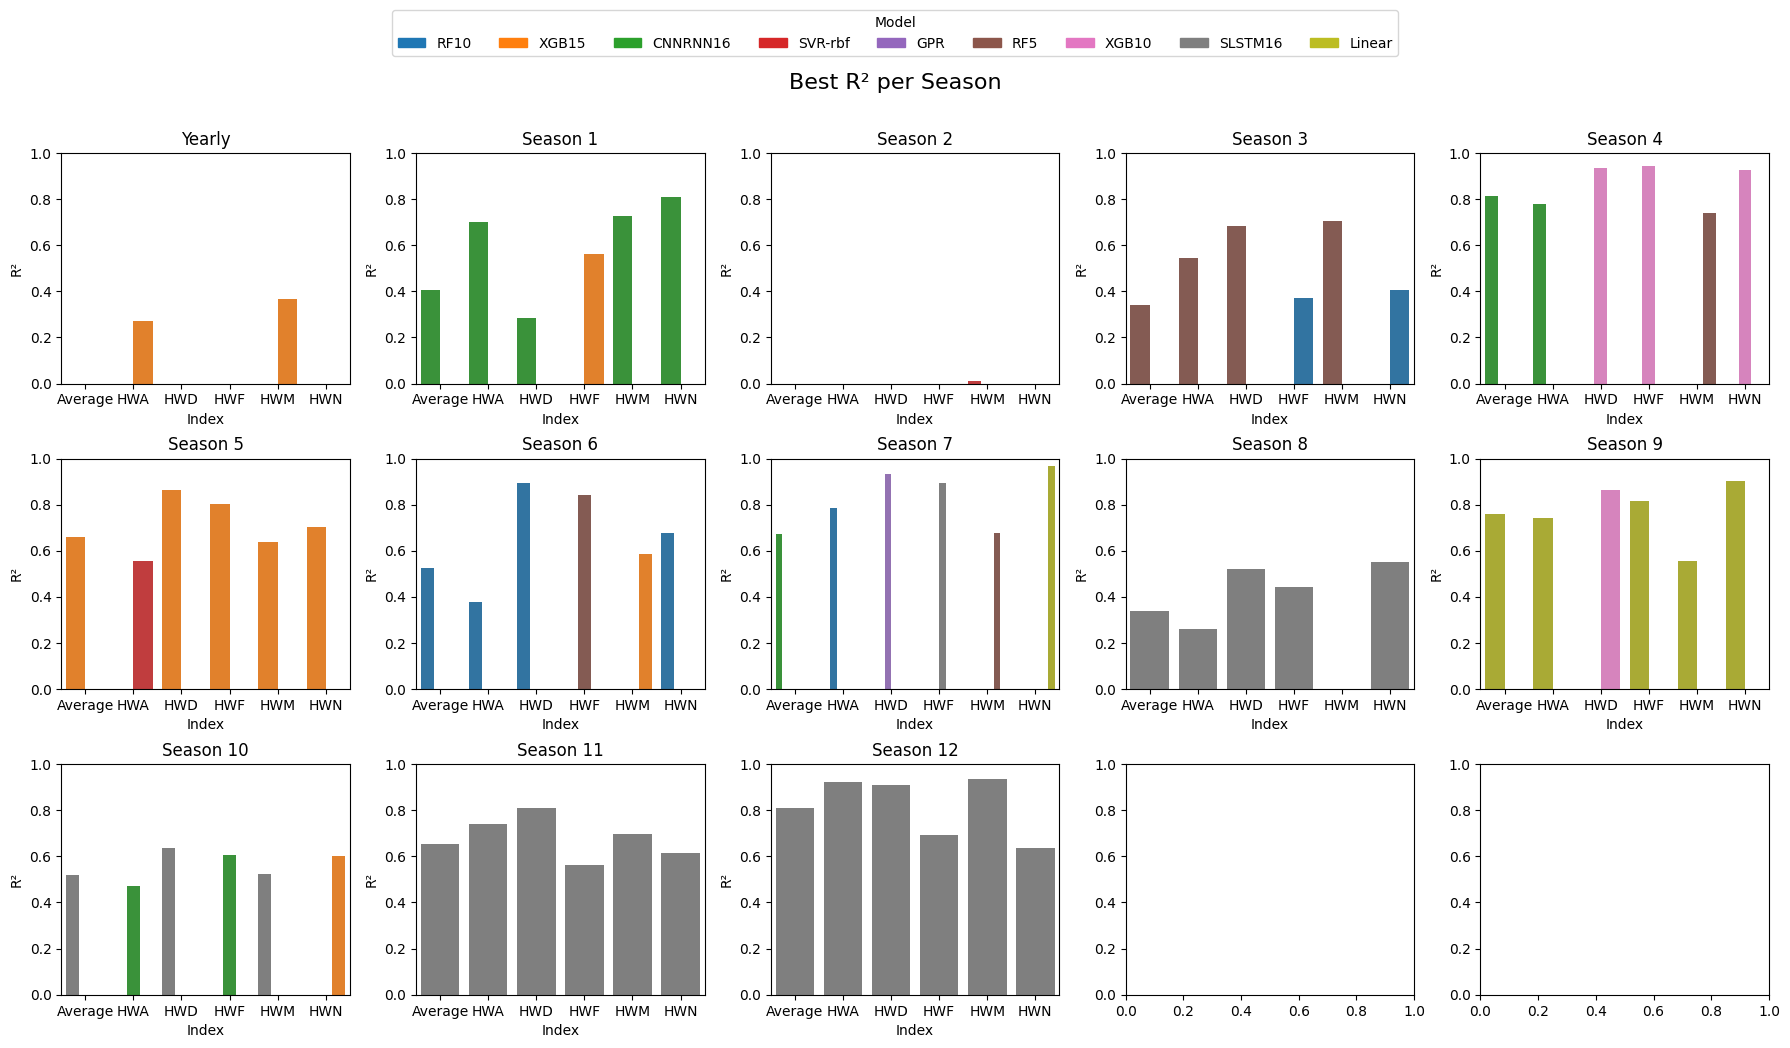

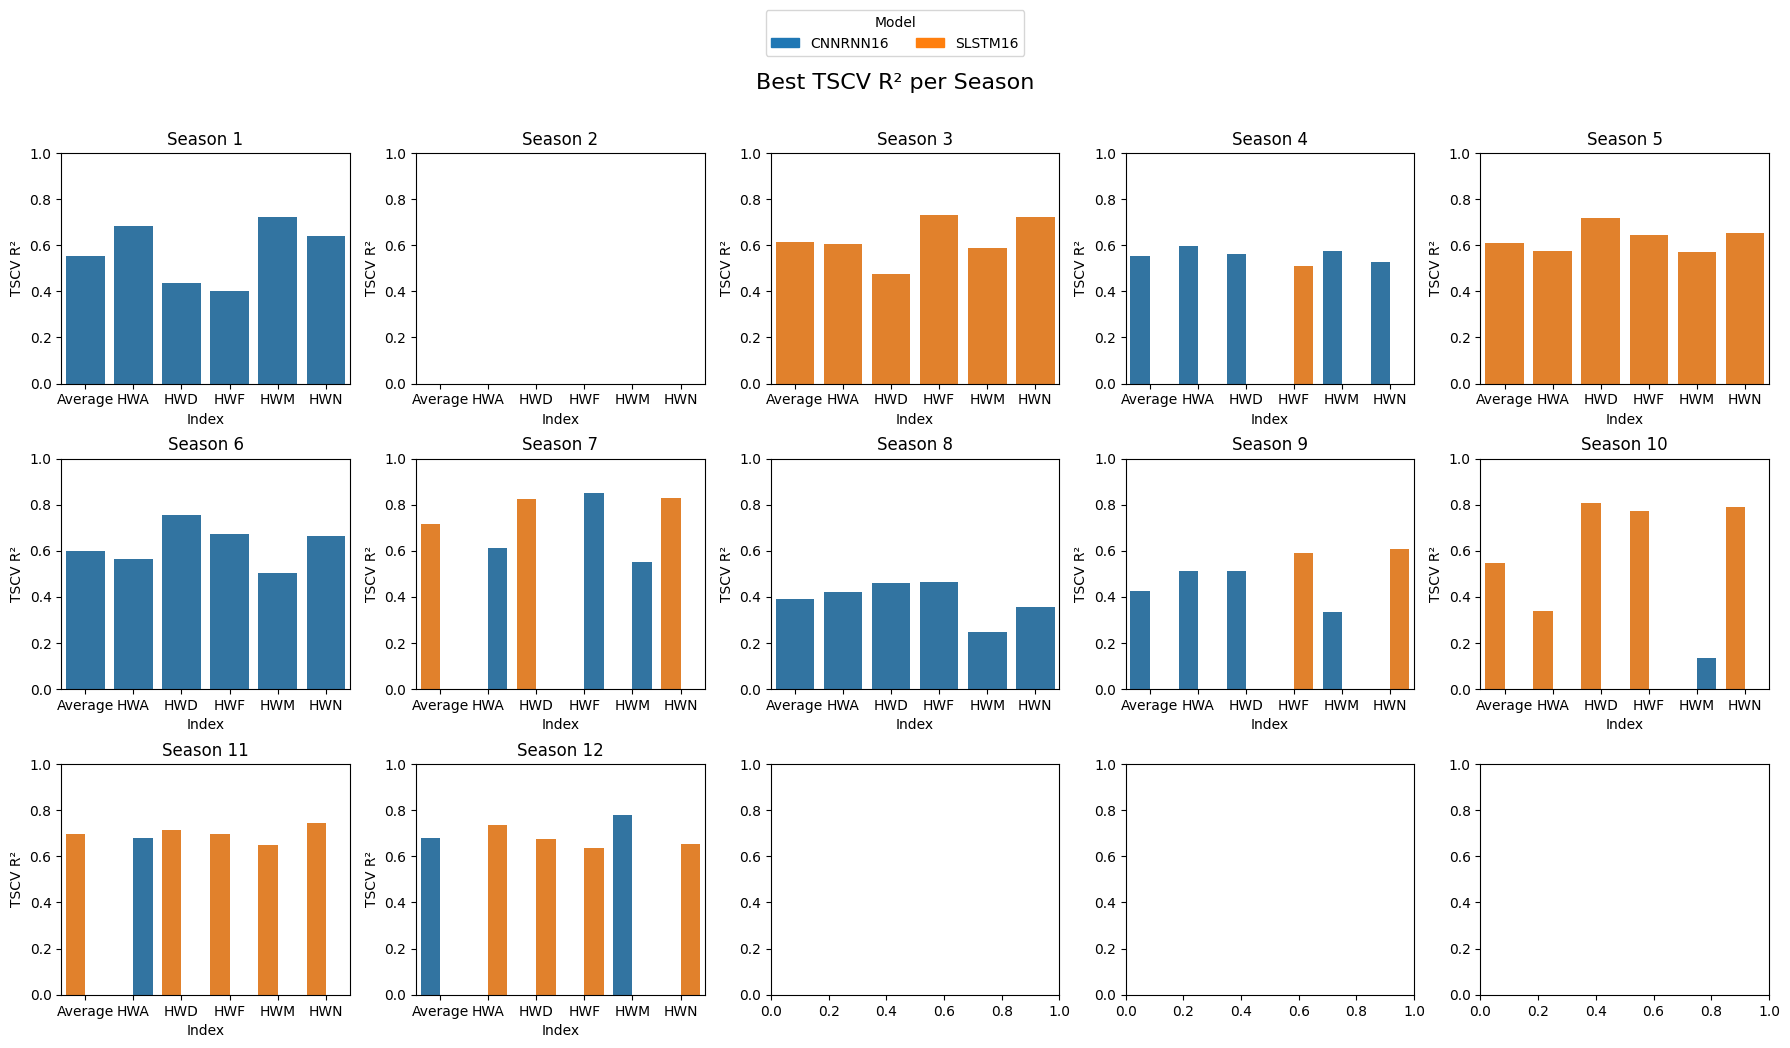

<Figure size 1800x1000 with 0 Axes>

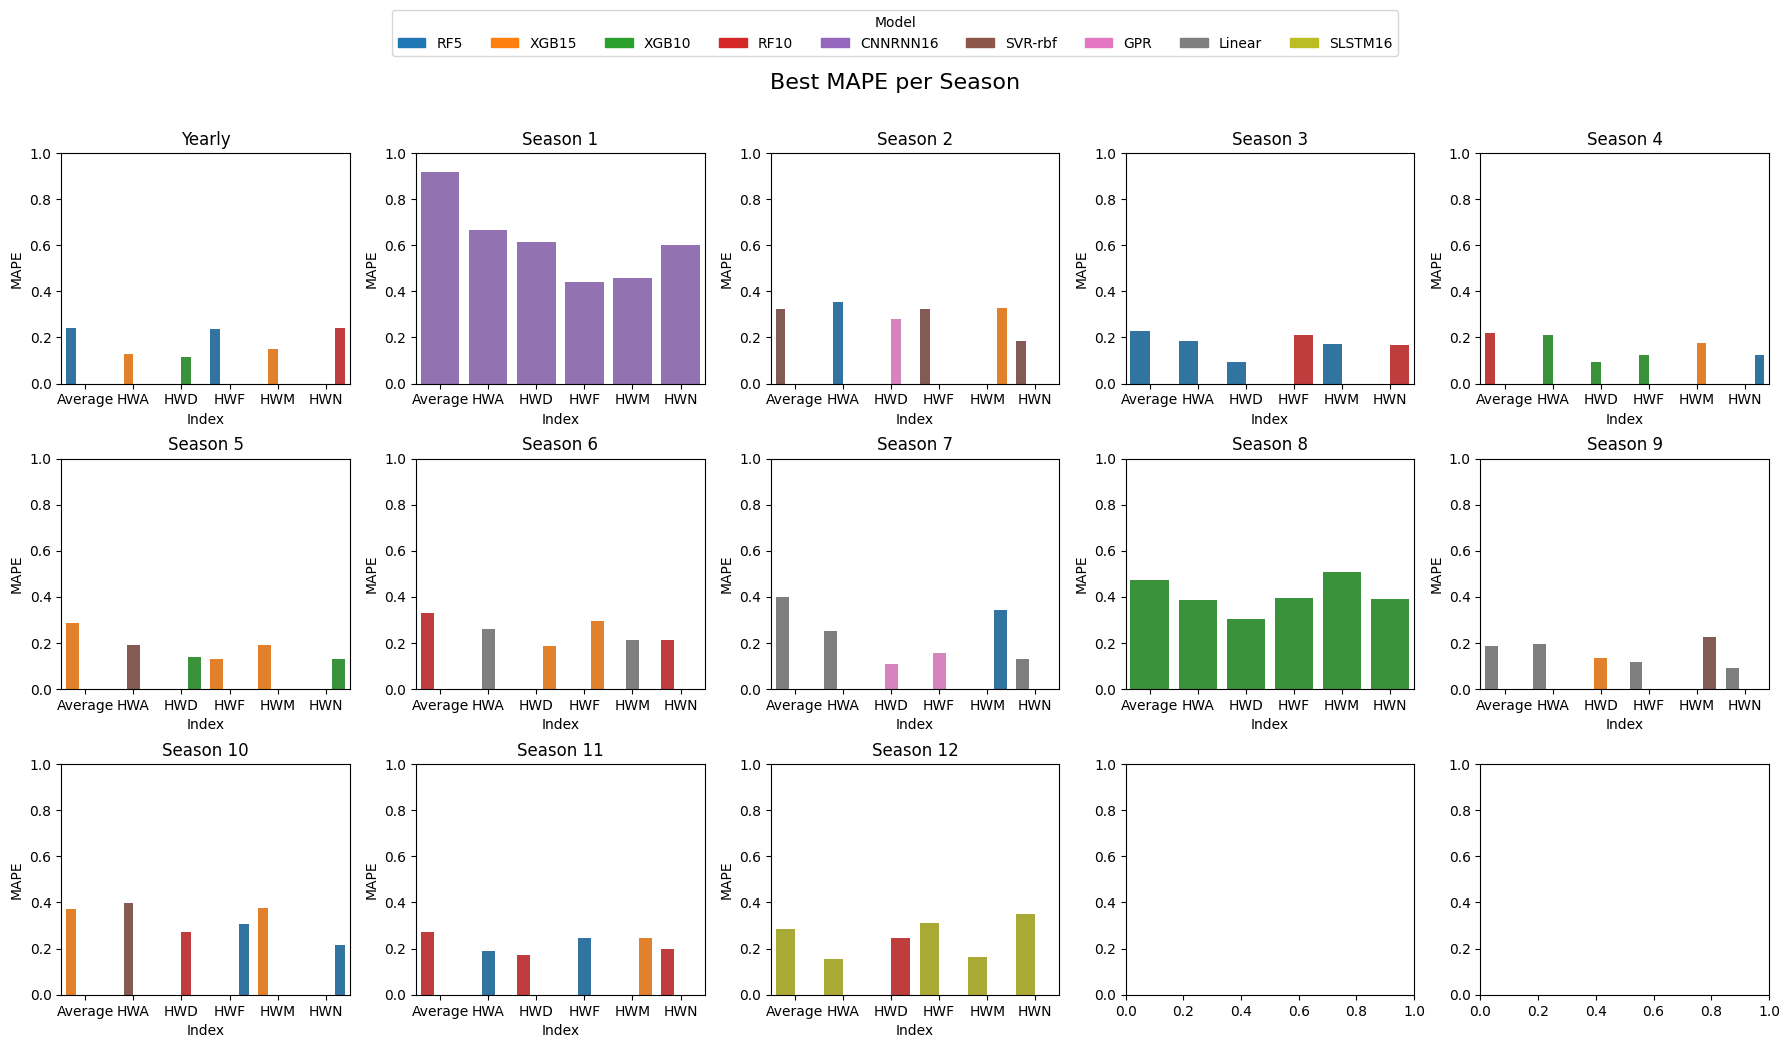

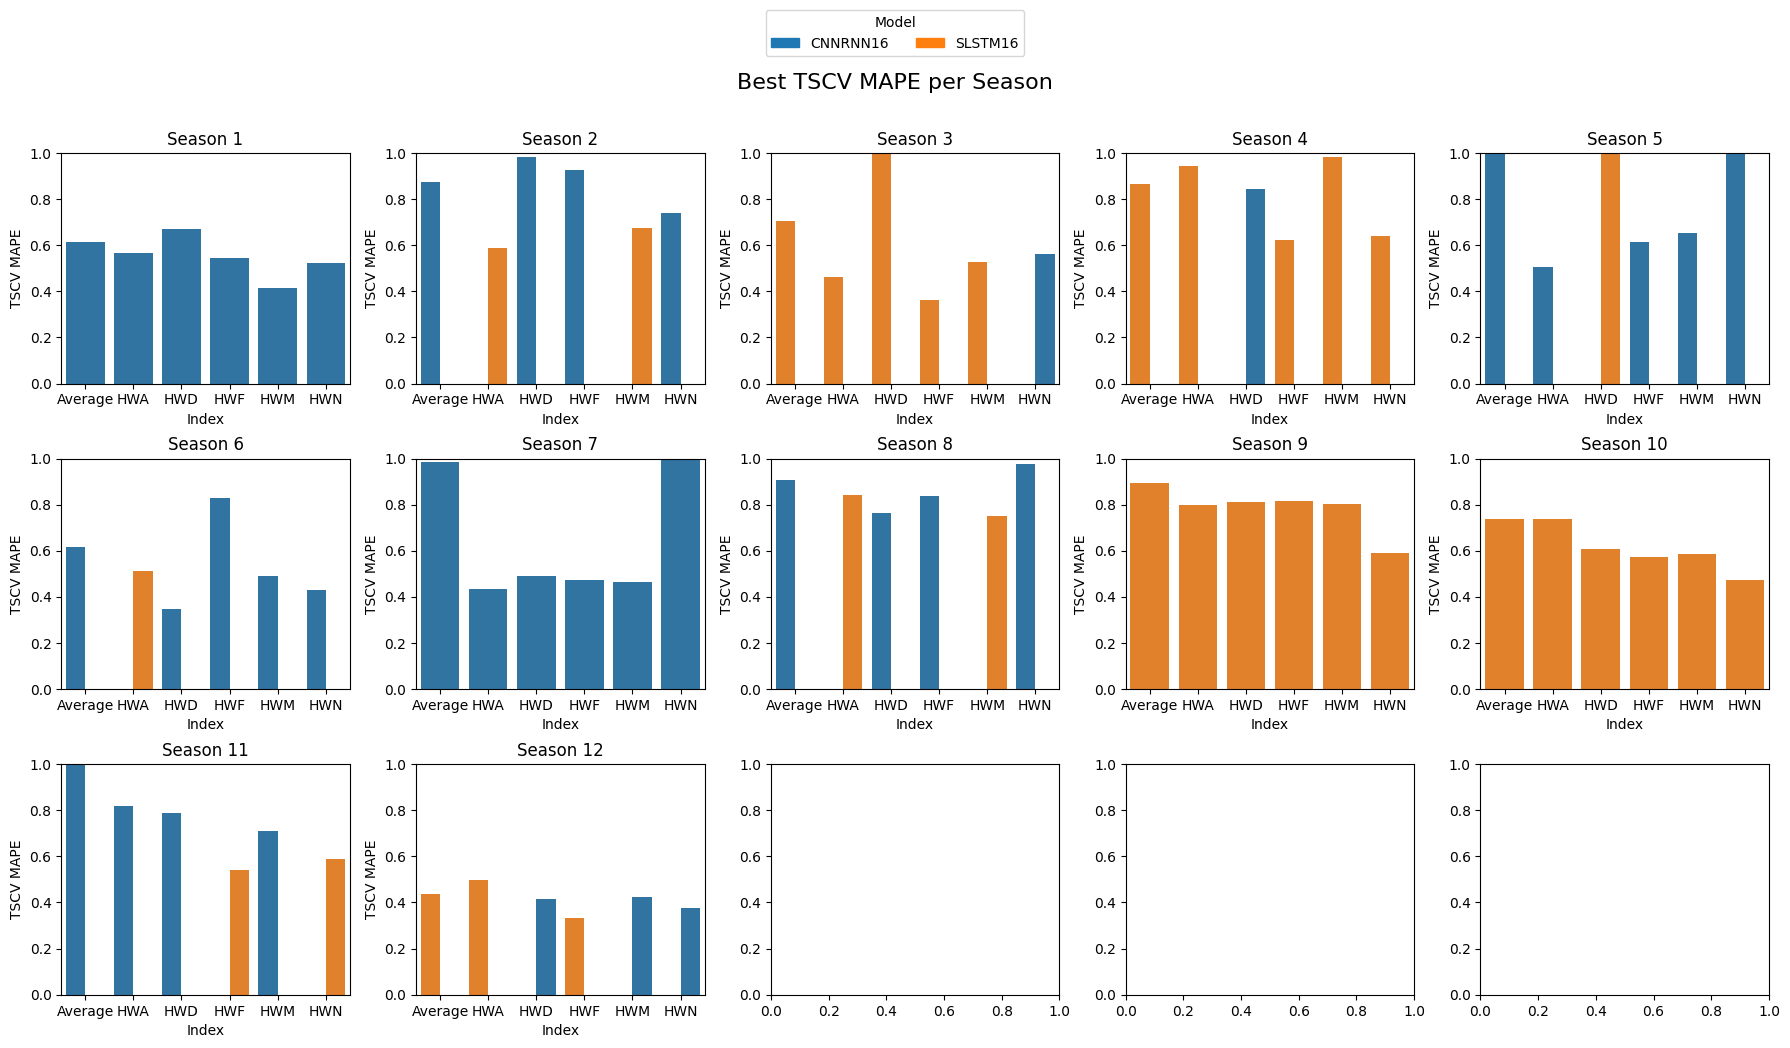

In [28]:
# Plot R2 results
plot_best_results_per_season(r2_seasons, "R²", "prediction", "Best R² per Season")

# Plot CV R2 results
plot_best_results_per_season(tscv_r2_seasons, "TSCV R²", "TSCV","Best TSCV R² per Season")

# Plot MAPE results (invert y-axis since lower is better)
plt.figure(figsize=(18, 10))
plot_best_results_per_season(mape_seasons, "MAPE", "prediction", "Best MAPE per Season")
plot_best_results_per_season(tscv_mape_seasons, "TSCV MAPE", "TSCV", "Best TSCV MAPE per Season")


In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_mape_seasons.sort_values("best_value", ascending=True))

model    index  best_value   id_data                       filename   
3   SLSTM16      HWF    0.330812  973780e5  predictor_973780e5_12.parquet  \
2  CNNRNN16      HWD    0.349077  7998e1d9   predictor_7998e1d9_6.parquet   
3   SLSTM16      HWF    0.362854  f6801988   predictor_f6801988_3.parquet   
5  CNNRNN16      HWN    0.374438  113de1dd  predictor_113de1dd_12.parquet   
4  CNNRNN16      HWM    0.413428  7ec4afcb   predictor_7ec4afcb_1.parquet   
2  CNNRNN16      HWD    0.413651  b3a4fa51  predictor_b3a4fa51_12.parquet   
4  CNNRNN16      HWM    0.422929  04a103c0  predictor_04a103c0_12.parquet   
5  CNNRNN16      HWN    0.432062  7998e1d9   predictor_7998e1d9_6.parquet   
1  CNNRNN16      HWA    0.434868  c2cf81c9   predictor_c2cf81c9_7.parquet   
0   SLSTM16  Average    0.436782  973780e5  predictor_973780e5_12.parquet   
4  CNNRNN16      HWM    0.462815  f0d402c6   predictor_f0d402c6_7.parquet   
1   SLSTM16      HWA    0.464185  dc255e93   predictor_dc255e93_3.parquet   
3  CNNRNN16      HWF    0.472949  3e628ee6   predictor_3e628ee6_7.parquet   
5   SLSTM16      HWN    0.475286  380e3094  predictor_380e3094_10.parquet   
4  CNNRNN16      HWM    0.490397  ae18d668   predictor_ae18d668_6.parquet   
2  CNNRNN16      HWD    0.490795  3e628ee6   predictor_3e628ee6_7.parquet   
1   SLSTM16      HWA    0.498450  c9589884  predictor_c9589884_12.parquet   
1  CNNRNN16      HWA    0.507215  c2cf81c9   predictor_c2cf81c9_5.parquet   
1   SLSTM16      HWA    0.511831  871a6dbd   predictor_871a6dbd_6.parquet   
5  CNNRNN16      HWN    0.523799  bbbf3b64   predictor_bbbf3b64_1.parquet   
4   SLSTM16      HWM    0.529147  c9589884   predictor_c9589884_3.parquet   
3   SLSTM16      HWF    0.539128  b649f2d0  predictor_b649f2d0_11.parquet   
3  CNNRNN16      HWF    0.545619  758ae625   predictor_758ae625_1.parquet   
5  CNNRNN16      HWN    0.562428  a0d5a8e8   predictor_a0d5a8e8_3.parquet   
1  CNNRNN16      HWA    0.564296  bbbf3b64   predictor_bbbf3b64_1.parquet   
3   SLSTM16      HWF    0.571937  82de8d97  predictor_82de8d97_10.parquet   
4   SLSTM16      HWM    0.587539  4253e219  predictor_4253e219_10.parquet   
1   SLSTM16      HWA    0.588247  871a6dbd   predictor_871a6dbd_2.parquet   
5   SLSTM16      HWN    0.588413  fb3bad0f   predictor_fb3bad0f_9.parquet   
5   SLSTM16      HWN    0.590204  147342c7  predictor_147342c7_11.parquet   
2   SLSTM16      HWD    0.609162  82de8d97  predictor_82de8d97_10.parquet   
3  CNNRNN16      HWF    0.613338  62c566c5   predictor_62c566c5_5.parquet   
0  CNNRNN16  Average    0.615296  864384ff   predictor_864384ff_6.parquet   
0  CNNRNN16  Average    0.615355  bc74a9b1   predictor_bc74a9b1_1.parquet   
3   SLSTM16      HWF    0.620942  8918ff8b   predictor_8918ff8b_4.parquet   
5   SLSTM16      HWN    0.641257  8918ff8b   predictor_8918ff8b_4.parquet   
4  CNNRNN16      HWM    0.653811  758ae625   predictor_758ae625_5.parquet   
2  CNNRNN16      HWD    0.672156  a93222d6   predictor_a93222d6_1.parquet   
4   SLSTM16      HWM    0.673153  871a6dbd   predictor_871a6dbd_2.parquet   
0   SLSTM16  Average    0.706238  dc255e93   predictor_dc255e93_3.parquet   
4  CNNRNN16      HWM    0.709712  62c566c5  predictor_62c566c5_11.parquet   
1   SLSTM16      HWA    0.735946  4253e219  predictor_4253e219_10.parquet   
0   SLSTM16  Average    0.737044  82de8d97  predictor_82de8d97_10.parquet   
5  CNNRNN16      HWN    0.740070  758ae625   predictor_758ae625_2.parquet   
4   SLSTM16      HWM    0.752174  7998e1d9   predictor_7998e1d9_8.parquet   
2  CNNRNN16      HWD    0.764486  2aa4a1b0   predictor_2aa4a1b0_8.parquet   
2  CNNRNN16      HWD    0.789313  62c566c5  predictor_62c566c5_11.parquet   
1   SLSTM16      HWA    0.797556  b30fc9d0   predictor_b30fc9d0_9.parquet   
4   SLSTM16      HWM    0.801017  8c74f02e   predictor_8c74f02e_9.parquet   
2   SLSTM16      HWD    0.811289  b30fc9d0   predictor_b30fc9d0_9.parquet   
3   SLSTM16      HWF    0.814009  18cb39ef   predictor_18cb39ef_9.parquet   
1 

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


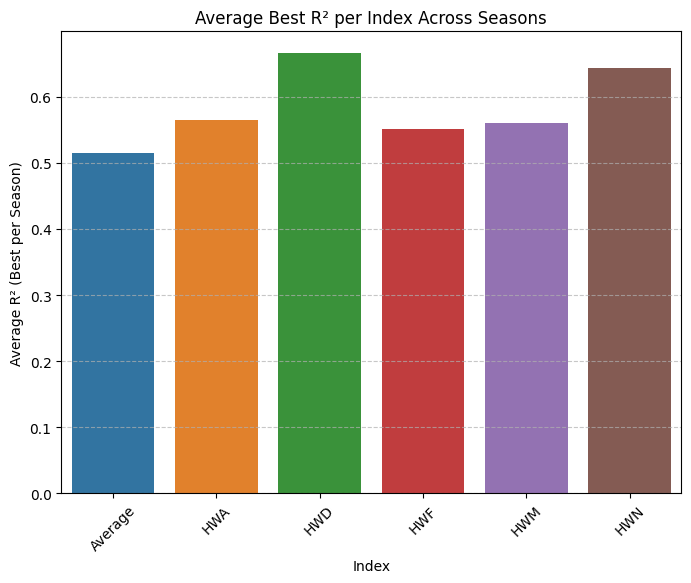

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


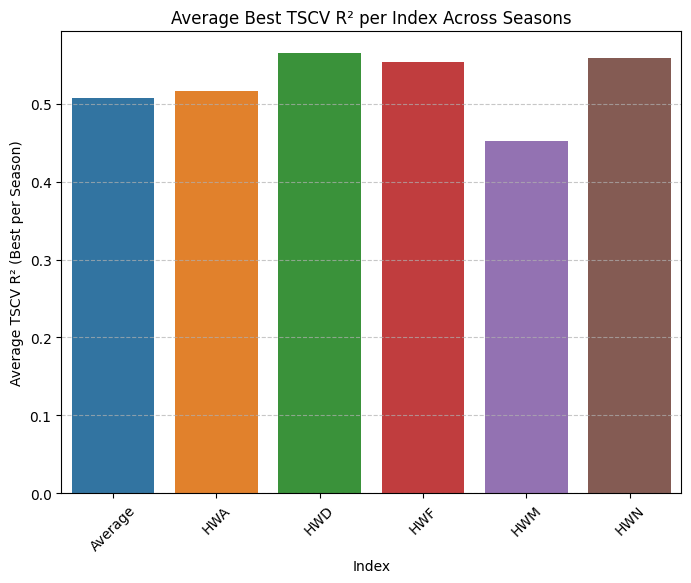

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


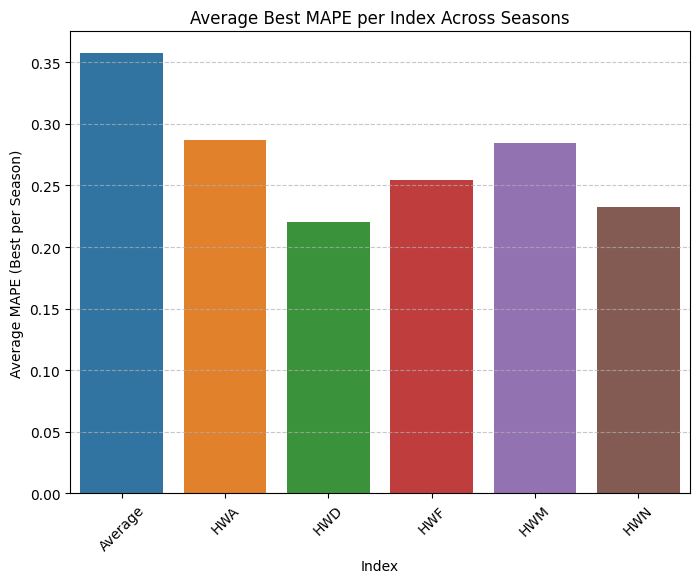

In [30]:
# Example usage
plot_average_best_results(r2_seasons, "R²", "Average Best R² per Index Across Seasons")
plot_average_best_results(tscv_r2_seasons, "TSCV R²", "Average Best TSCV R² per Index Across Seasons")
plot_average_best_results(mape_seasons, "MAPE", "Average Best MAPE per Index Across Seasons")

In [ ]:
with open("pcas_1972.pkl", "rb") as inp:
    pcas_sst = pickle.load(inp)
interest_ids = cv_r2_seasons[(cv_r2_seasons["best_value"] >= 0.3)]
df1 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        continue
    else:
        temp = ""
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in row["extra_indices"]:
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
                k+=1
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_sst[id_pca].variables_dict.values())
            box = pcas_sst[id_pca].box
            mode = pcas[i][-1]
            df1.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_sst
display(df1)



id_data id_pca  mode                     box          variables
0   915ed15f   None  None                    None                PDO
1   915ed15f   None  None                    None                ONI
2   915ed15f   None  None                    None                SAM
3   915ed15f    950     3  [247.5, 290, -60, -30]                [Z]
4   915ed15f    959     3  [247.5, 290, -60, -30]            [SP, Z]
5   915ed15f    980     3  [247.5, 290, -60, -30]       [SP, U10, Z]
6   915ed15f    650     3    [205, 247.5, -30, 0]           [V10, Z]
7   915ed15f    964     3  [247.5, 290, -60, -30]           [U10, Z]
8   915ed15f    946     3  [247.5, 290, -60, -30]               [SP]
9   915ed15f    635     3    [205, 247.5, -30, 0]                [Z]
10  915ed15f    670     3    [205, 247.5, -30, 0]      [U10, V10, Z]
11  915ed15f    698     3    [247.5, 290, -30, 0]                [Z]
12  915ed15f   1343     3      [205, 290, -30, 0]           [V10, Z]
13  915ed15f    887     3  [205, 247.5, -60, -30]                [Z]
14  915ed15f    739     3    [247.5, 290, -30, 0]  [SST, SP, V10, Z]
15  915ed15f    648     2    [205, 247.5, -30, 0]         [U10, V10]
16  915ed15f    649     3    [205, 247.5, -30, 0]           [U10, Z]
17  915ed15f    832     2  [162.5, 205, -60, -30]          [SP, V10]
18  915ed15f    667     3    [205, 247.5, -30, 0]    [TTR, U10, V10]
19  915ed15f    851     3  [162.5, 205, -60, -30]     [SP, TTR, V10]
20  915ed15f    716     3    [247.5, 290, -30, 0]     [SST, SP, V10]
21  915ed15f    684     3    [205, 247.5, -30, 0]  [SP, U10, V10, Z]
22  915ed15f   1341     2      [205, 290, -30, 0]         [U10, V10]
23  54b84553   None  None                    None                PDO
24  54b84553   None  None                    None                ONI
25  54b84553   None  None                    None                SAM
26  54b84553    950     3  [247.5, 290, -60, -30]                [Z]
27  54b84553    959     3  [247.5, 290, -60, -30]            [SP, Z]
28  54b84553    980     3  [247.5, 290, -60, -30]       [SP, U10, Z]
29  54b84553    650     3    [205, 247.5, -30, 0]           [V10, Z]
30  54b84553    964     3  [247.5, 290, -60, -30]           [U10, Z]
31  54b84553    946     3  [247.5, 290, -60, -30]               [SP]
32  54b84553    635     3    [205, 247.5, -30, 0]                [Z]
33  54b84553    670     3    [205, 247.5, -30, 0]      [U10, V10, Z]
34  54b84553    698     3    [247.5, 290, -30, 0]                [Z]
35  54b84553   1343     3      [205, 290, -30, 0]           [V10, Z]
36  54b84553    887     3  [205, 247.5, -60, -30]                [Z]
37  54b84553    739     3    [247.5, 290, -30, 0]  [SST, SP, V10, Z]
38  54b84553    648     2    [205, 247.5, -30, 0]         [U10, V10]
39  54b84553    649     3    [205, 247.5, -30, 0]           [U10, Z]
40  54b84553    832     2  [162.5, 205, -60, -30]          [SP, V10]
41  54b84553    667     3    [205, 247.5, -30, 0]    [TTR, U10, V10]
42  54b84553    851     3  [162.5, 205, -60, -30]     [SP, TTR, V10]
43  54b84553    716     3    [247.5, 290, -30, 0]     [SST, SP, V10]
44  54b84553    684     3    [205, 247.5, -30, 0]  [SP, U10, V10, Z]
45  54b84553   1341     2      [205, 290, -30, 0]         [U10, V10]

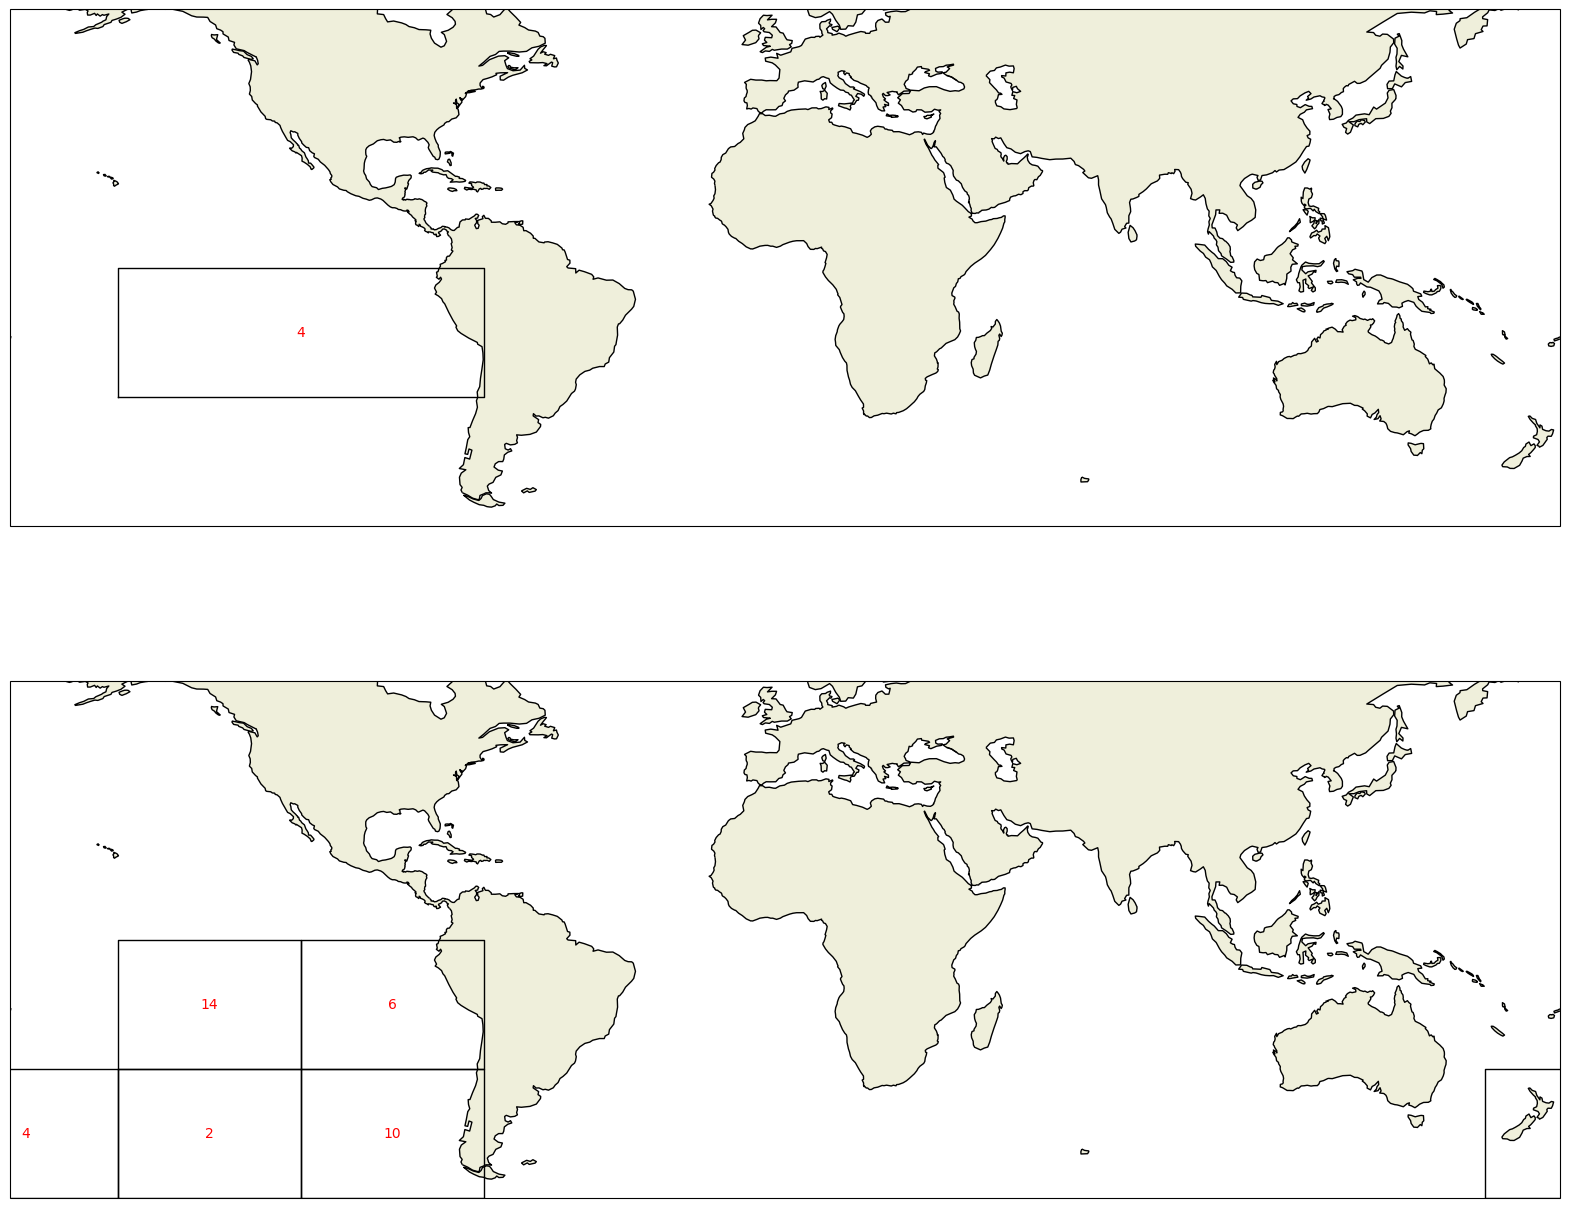

In [ ]:
plot_grid_count(df1)

In [31]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
interest_ids = tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        temp = "_t2m"
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in str(row["extra_indices"]):
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                     box          variables
0    7ec4afcb     962    1  [247.5, 290, -60, -30]         [U10, T2M]
1    7ec4afcb     955    1  [247.5, 290, -60, -30]          [SP, T2M]
2    7ec4afcb     965    1  [247.5, 290, -60, -30]           [Z, T2M]
3    7ec4afcb     984    1  [247.5, 290, -60, -30]      [U10, Z, T2M]
4    7ec4afcb     972    1  [247.5, 290, -60, -30]     [SP, U10, T2M]
..        ...     ...  ...                     ...                ...
335  113de1dd    1454    1    [205, 290, -60, -30]              [T2M]
336  113de1dd     985    1  [247.5, 290, -60, -30]      [V10, Z, T2M]
337  113de1dd     803    1  [120, 162.5, -60, -30]  [SP, U10, V10, Z]
338  113de1dd     756    1  [120, 162.5, -60, -30]               [SP]
339  113de1dd    1459    1    [205, 290, -60, -30]          [SP, T2M]

[340 rows x 5 columns]

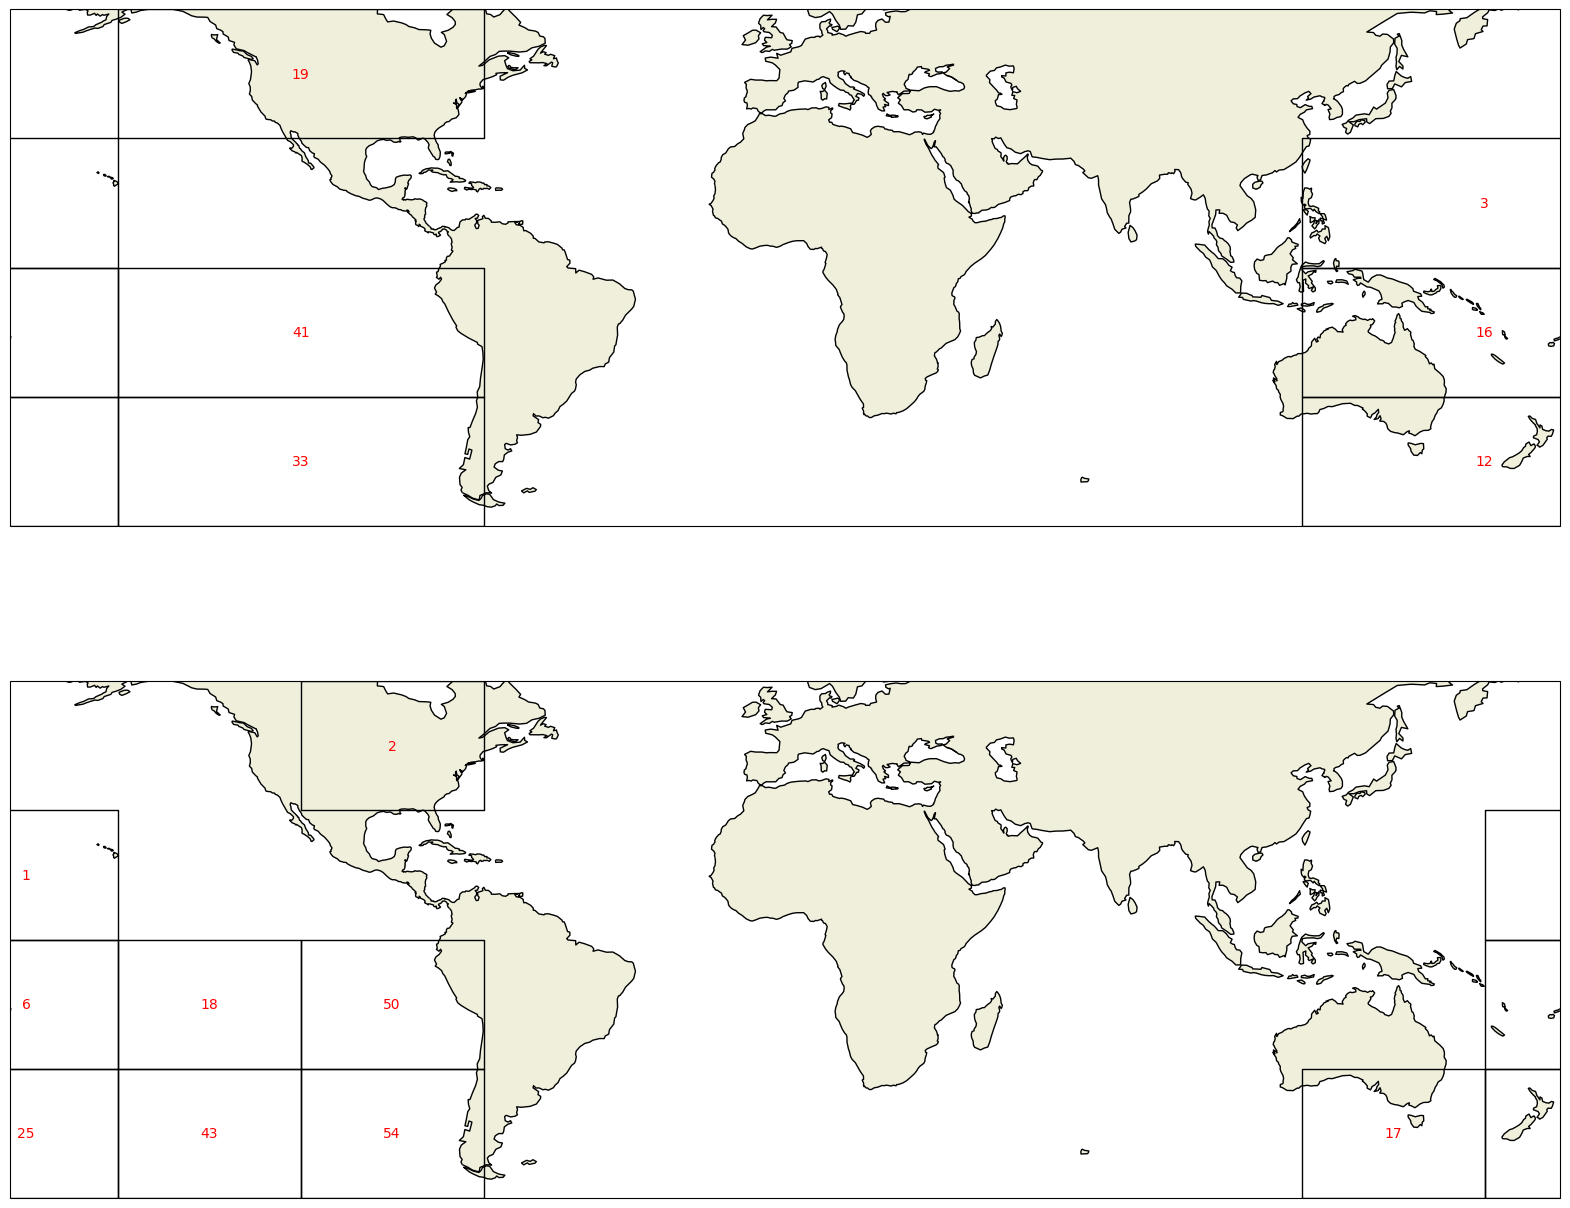

In [32]:
plot_grid_count(df2)

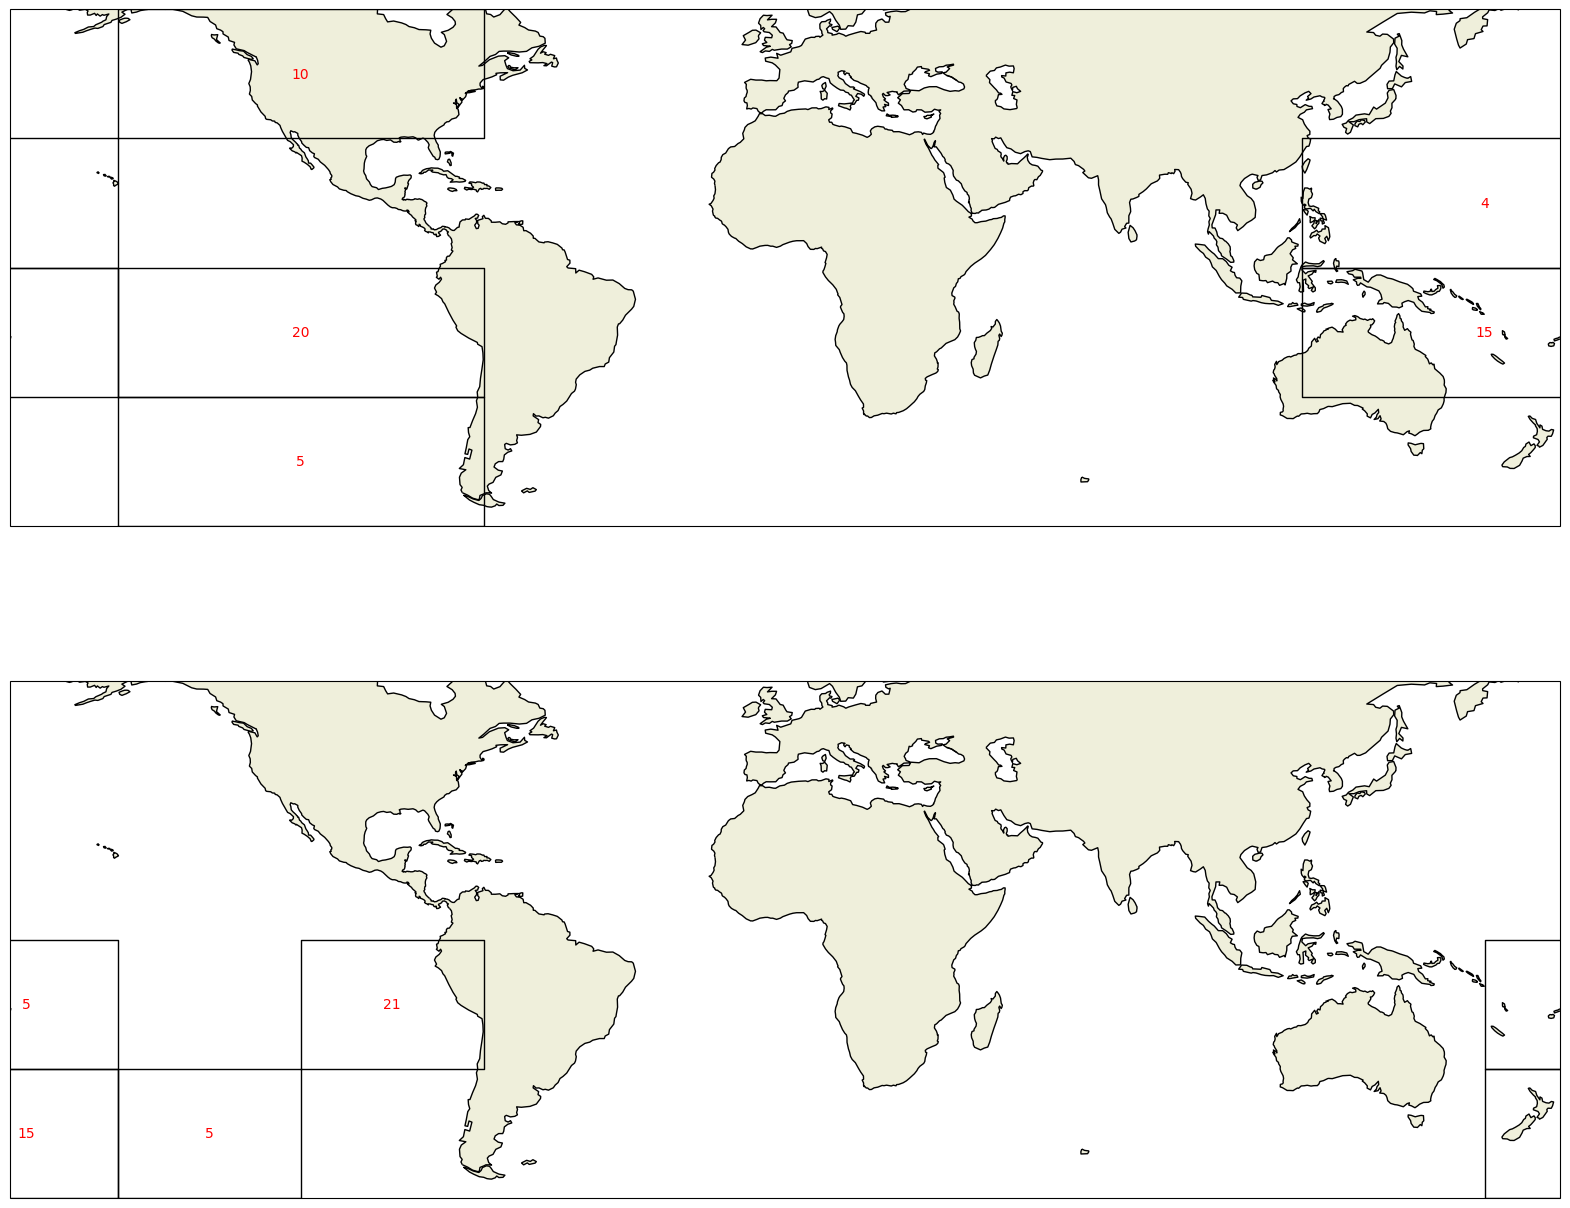

In [ ]:
# plot_grid_count(df2) old

### OLD RESULTS

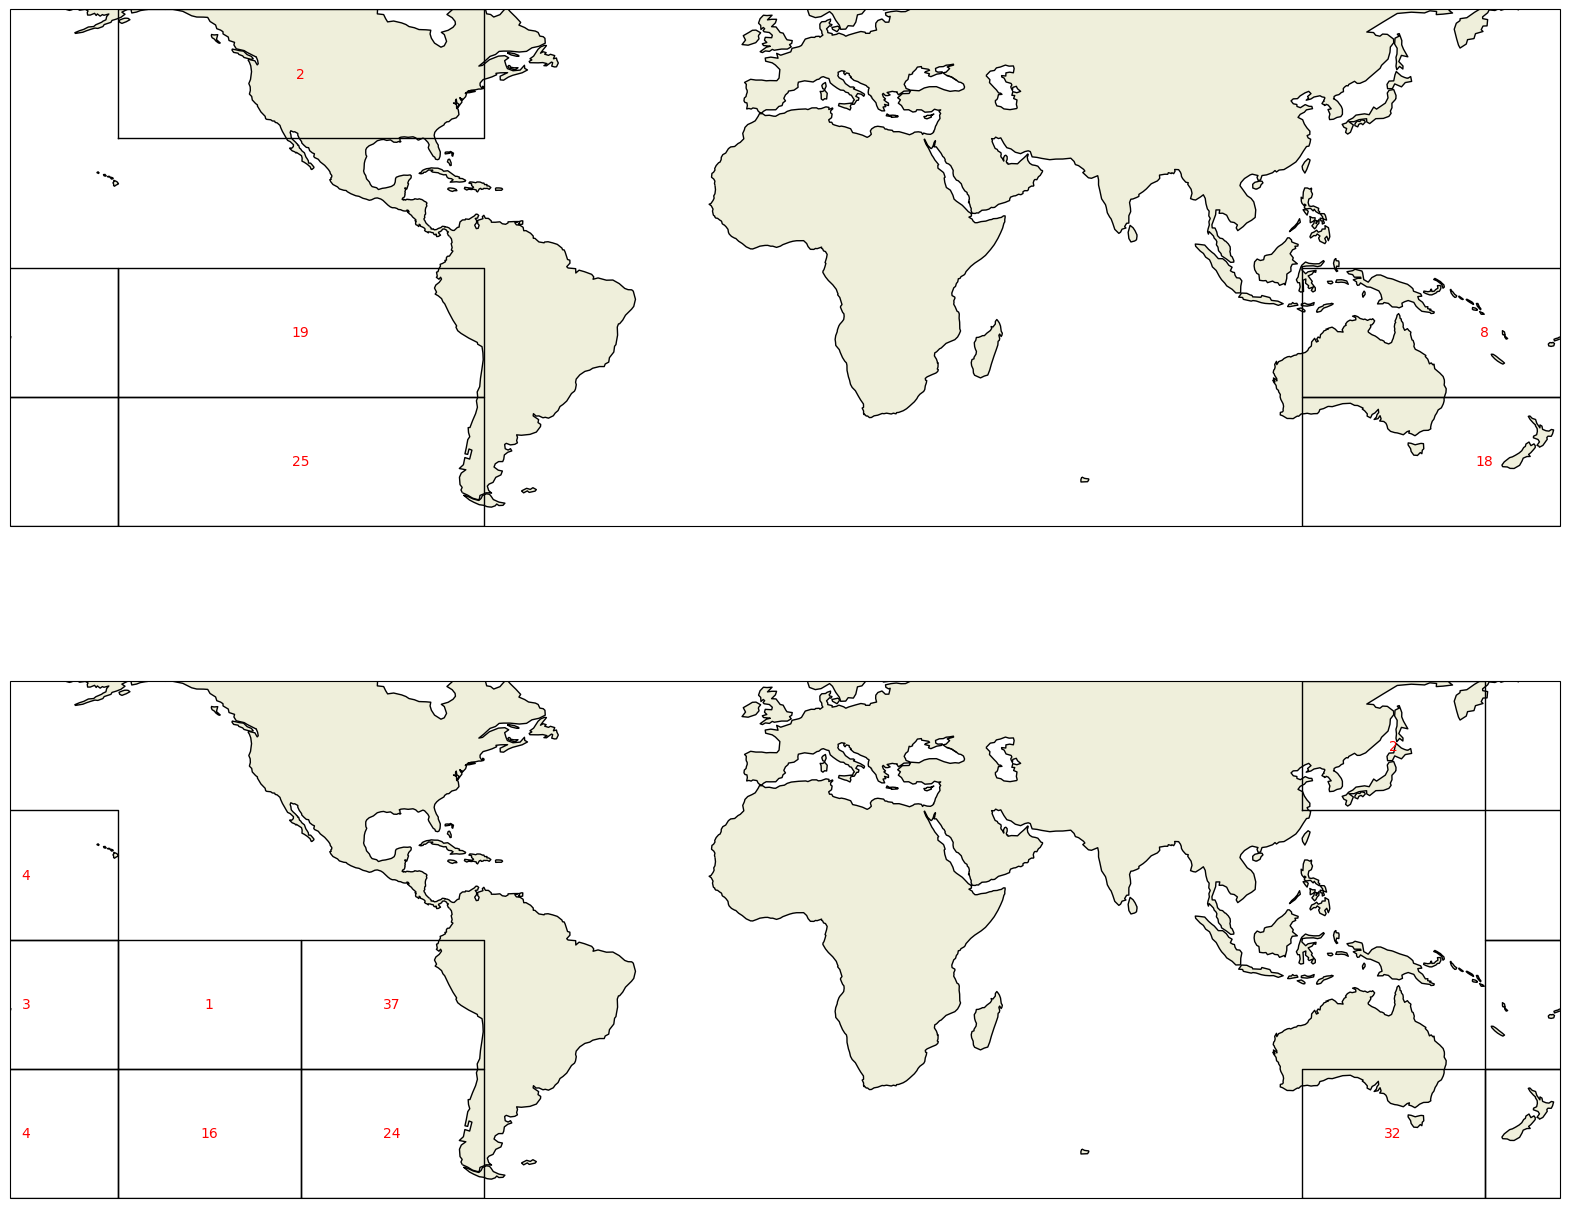

In [ ]:
plot_grid_count(df1)

In [ ]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["var_temp"] == "t2m":
        temp = "_t2m"
        with open("pcas_t2m.pkl", "rb") as inp:
            pcas_t2m = pickle.load(inp)
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        pcas = list(data_file.columns[5:])
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                     box       variables
0   76c7ef4c     965    2  [247.5, 290, -60, -30]        [Z, T2M]
1   76c7ef4c     885    1  [205, 247.5, -60, -30]           [V10]
2   76c7ef4c     766    1  [120, 162.5, -60, -30]       [SP, T2M]
3   76c7ef4c     780    2  [120, 162.5, -60, -30]  [SP, TTR, T2M]
4   76c7ef4c     887    2  [205, 247.5, -60, -30]           [T2M]
5   6b480627     965    2  [247.5, 290, -60, -30]        [Z, T2M]
6   6b480627     885    1  [205, 247.5, -60, -30]           [V10]
7   6b480627     766    1  [120, 162.5, -60, -30]       [SP, T2M]
8   6b480627     780    2  [120, 162.5, -60, -30]  [SP, TTR, T2M]
9   6b480627     887    2  [205, 247.5, -60, -30]           [T2M]
10  e75778a3    1360    1      [205, 290, -30, 0]   [U10, V10, Z]
11  e75778a3    1338    1      [205, 290, -30, 0]      [U10, V10]
12  e75778a3    1339    2      [205, 290, -30, 0]        [U10, Z]
13  e75778a3     730    1    [247.5, 290, -30, 0]   [U10, V10, Z]
14  e75778a3    1275    2      [120, 205, -30, 0]      [U10, V10]
15  e75778a3    1325    1      [205, 290, -30, 0]           [U10]
16  e75778a3     708    1    [247.5, 290, -30, 0]      [U10, V10]
17  e75778a3     571    2    [162.5, 205, -30, 0]             [Z]
18  e75778a3     839    2  [162.5, 205, -60, -30]        [Z, T2M]
19  e75778a3    1097    1      [205, 290, 30, 60]    [SP, U10, Z]
20  fc43815b    1360    1      [205, 290, -30, 0]   [U10, V10, Z]
21  fc43815b    1338    1      [205, 290, -30, 0]      [U10, V10]
22  fc43815b    1339    2      [205, 290, -30, 0]        [U10, Z]
23  fc43815b     730    1    [247.5, 290, -30, 0]   [U10, V10, Z]
24  fc43815b    1275    2      [120, 205, -30, 0]      [U10, V10]
25  fc43815b    1325    1      [205, 290, -30, 0]           [U10]
26  fc43815b     708    1    [247.5, 290, -30, 0]      [U10, V10]
27  fc43815b     571    2    [162.5, 205, -30, 0]             [Z]
28  fc43815b     839    2  [162.5, 205, -60, -30]        [Z, T2M]
29  fc43815b    1097    1      [205, 290, 30, 60]    [SP, U10, Z]

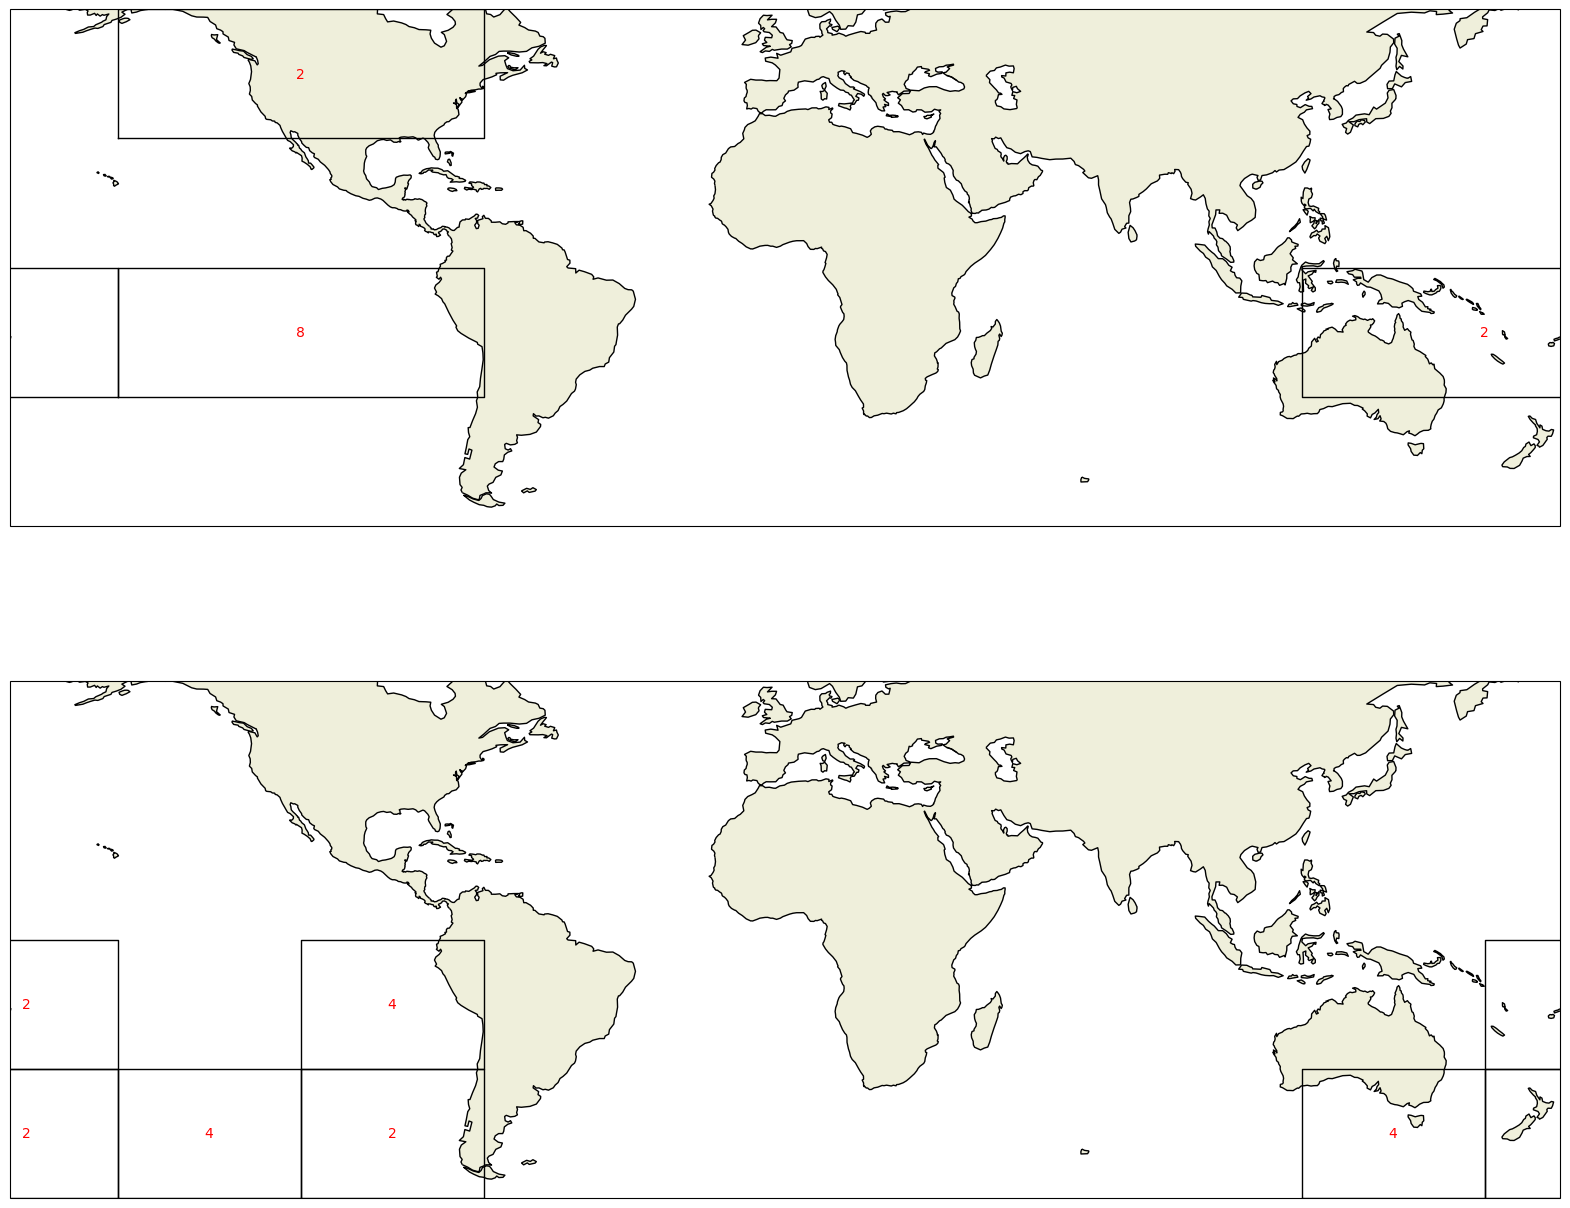

In [ ]:
plot_grid_count(df2)